# Generazione Rumore Artificiale (Serie Multiple)

### Serie Daily

Il file contiene 4682 record
                      Open   High    Low  Close       Vol
Date_Time                                                
2000-01-03 16:00:00  68.63  69.19  63.81  65.19  12030600
2000-01-04 16:00:00  64.00  64.31  61.19  61.69   8722000
2000-01-05 16:00:00  61.75  63.00  61.00  62.00   6939800
2000-01-06 16:00:00  61.63  62.00  60.00  60.00   6607600
2000-01-07 16:00:00  61.75  63.50  60.75  63.50   6207300
2000-01-10 16:00:00  62.00  63.56  62.00  63.19   5455400
2000-01-11 16:00:00  63.44  63.63  61.25  61.56   4371600
2000-01-12 16:00:00  61.56  62.06  60.69  61.06   4629400
2000-01-13 16:00:00  62.13  62.50  61.50  62.13   4538900
2000-01-14 16:00:00  62.38  62.44  61.19  61.94   4578000

                 count          mean           std     min           1%  \
Open            4681.0  6.262071e+01  4.408440e+01   17.74       20.994   
High            4681.0  6.322779e+01  4.432258e+01   18.60       21.480   
Low             4681.0  6.200205e+01  4.383873e+0

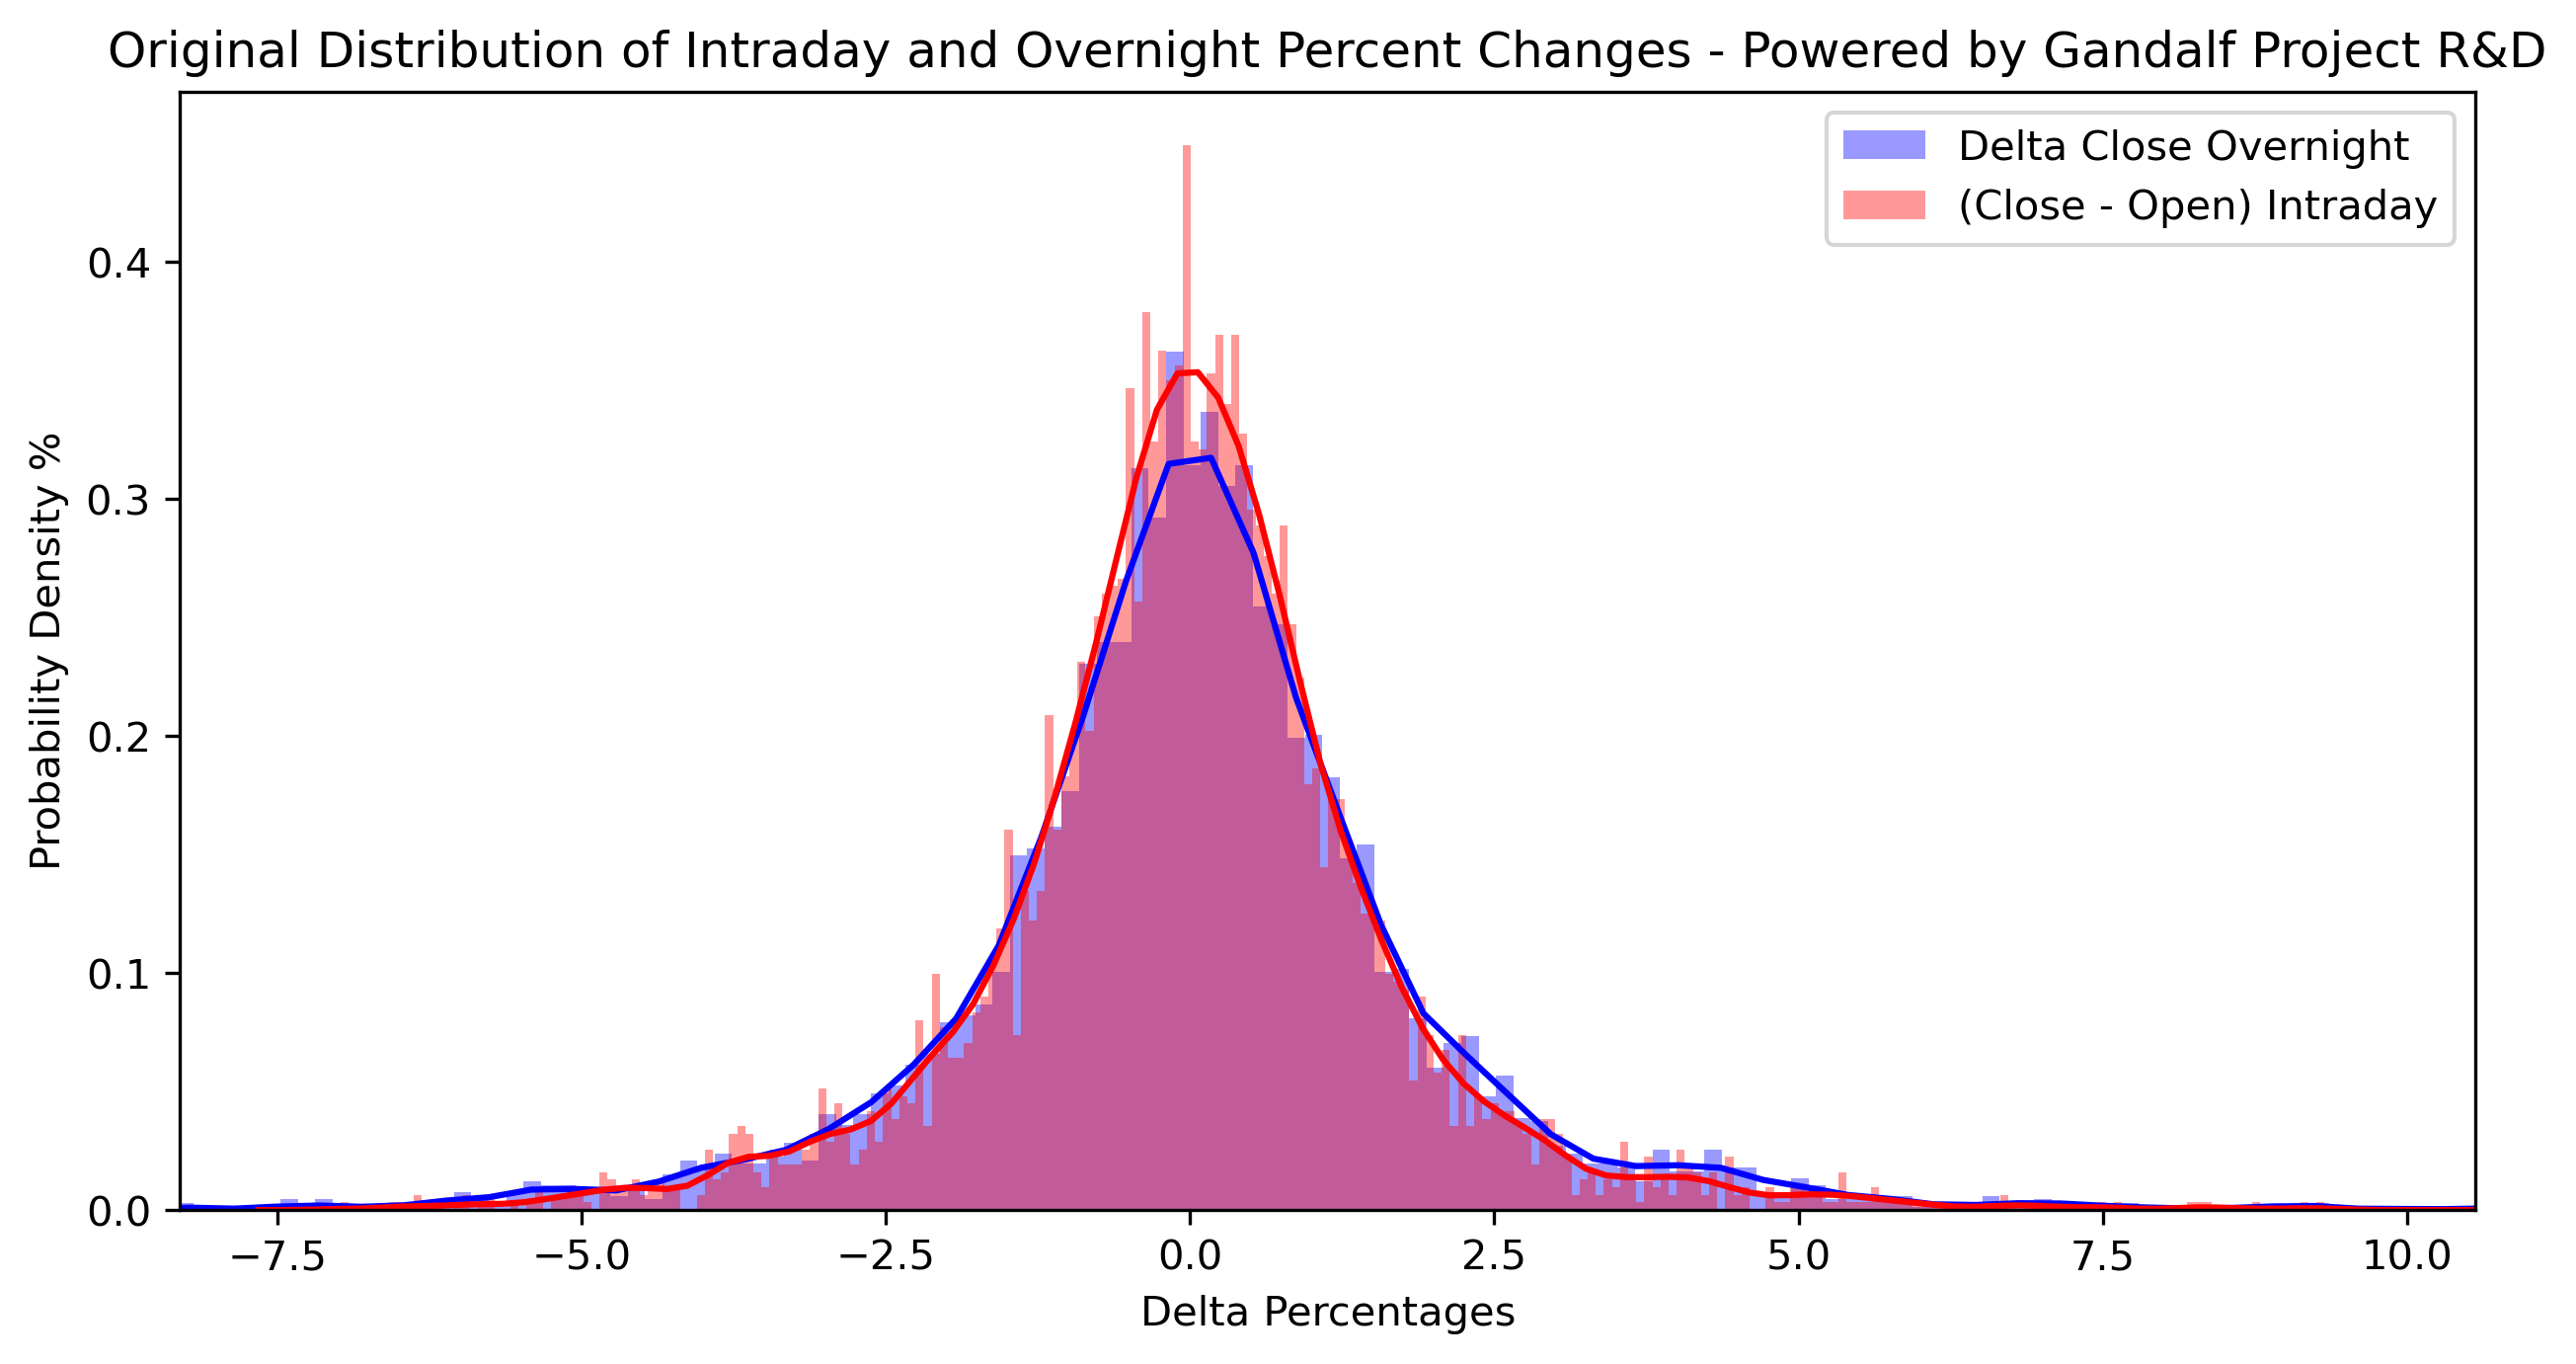

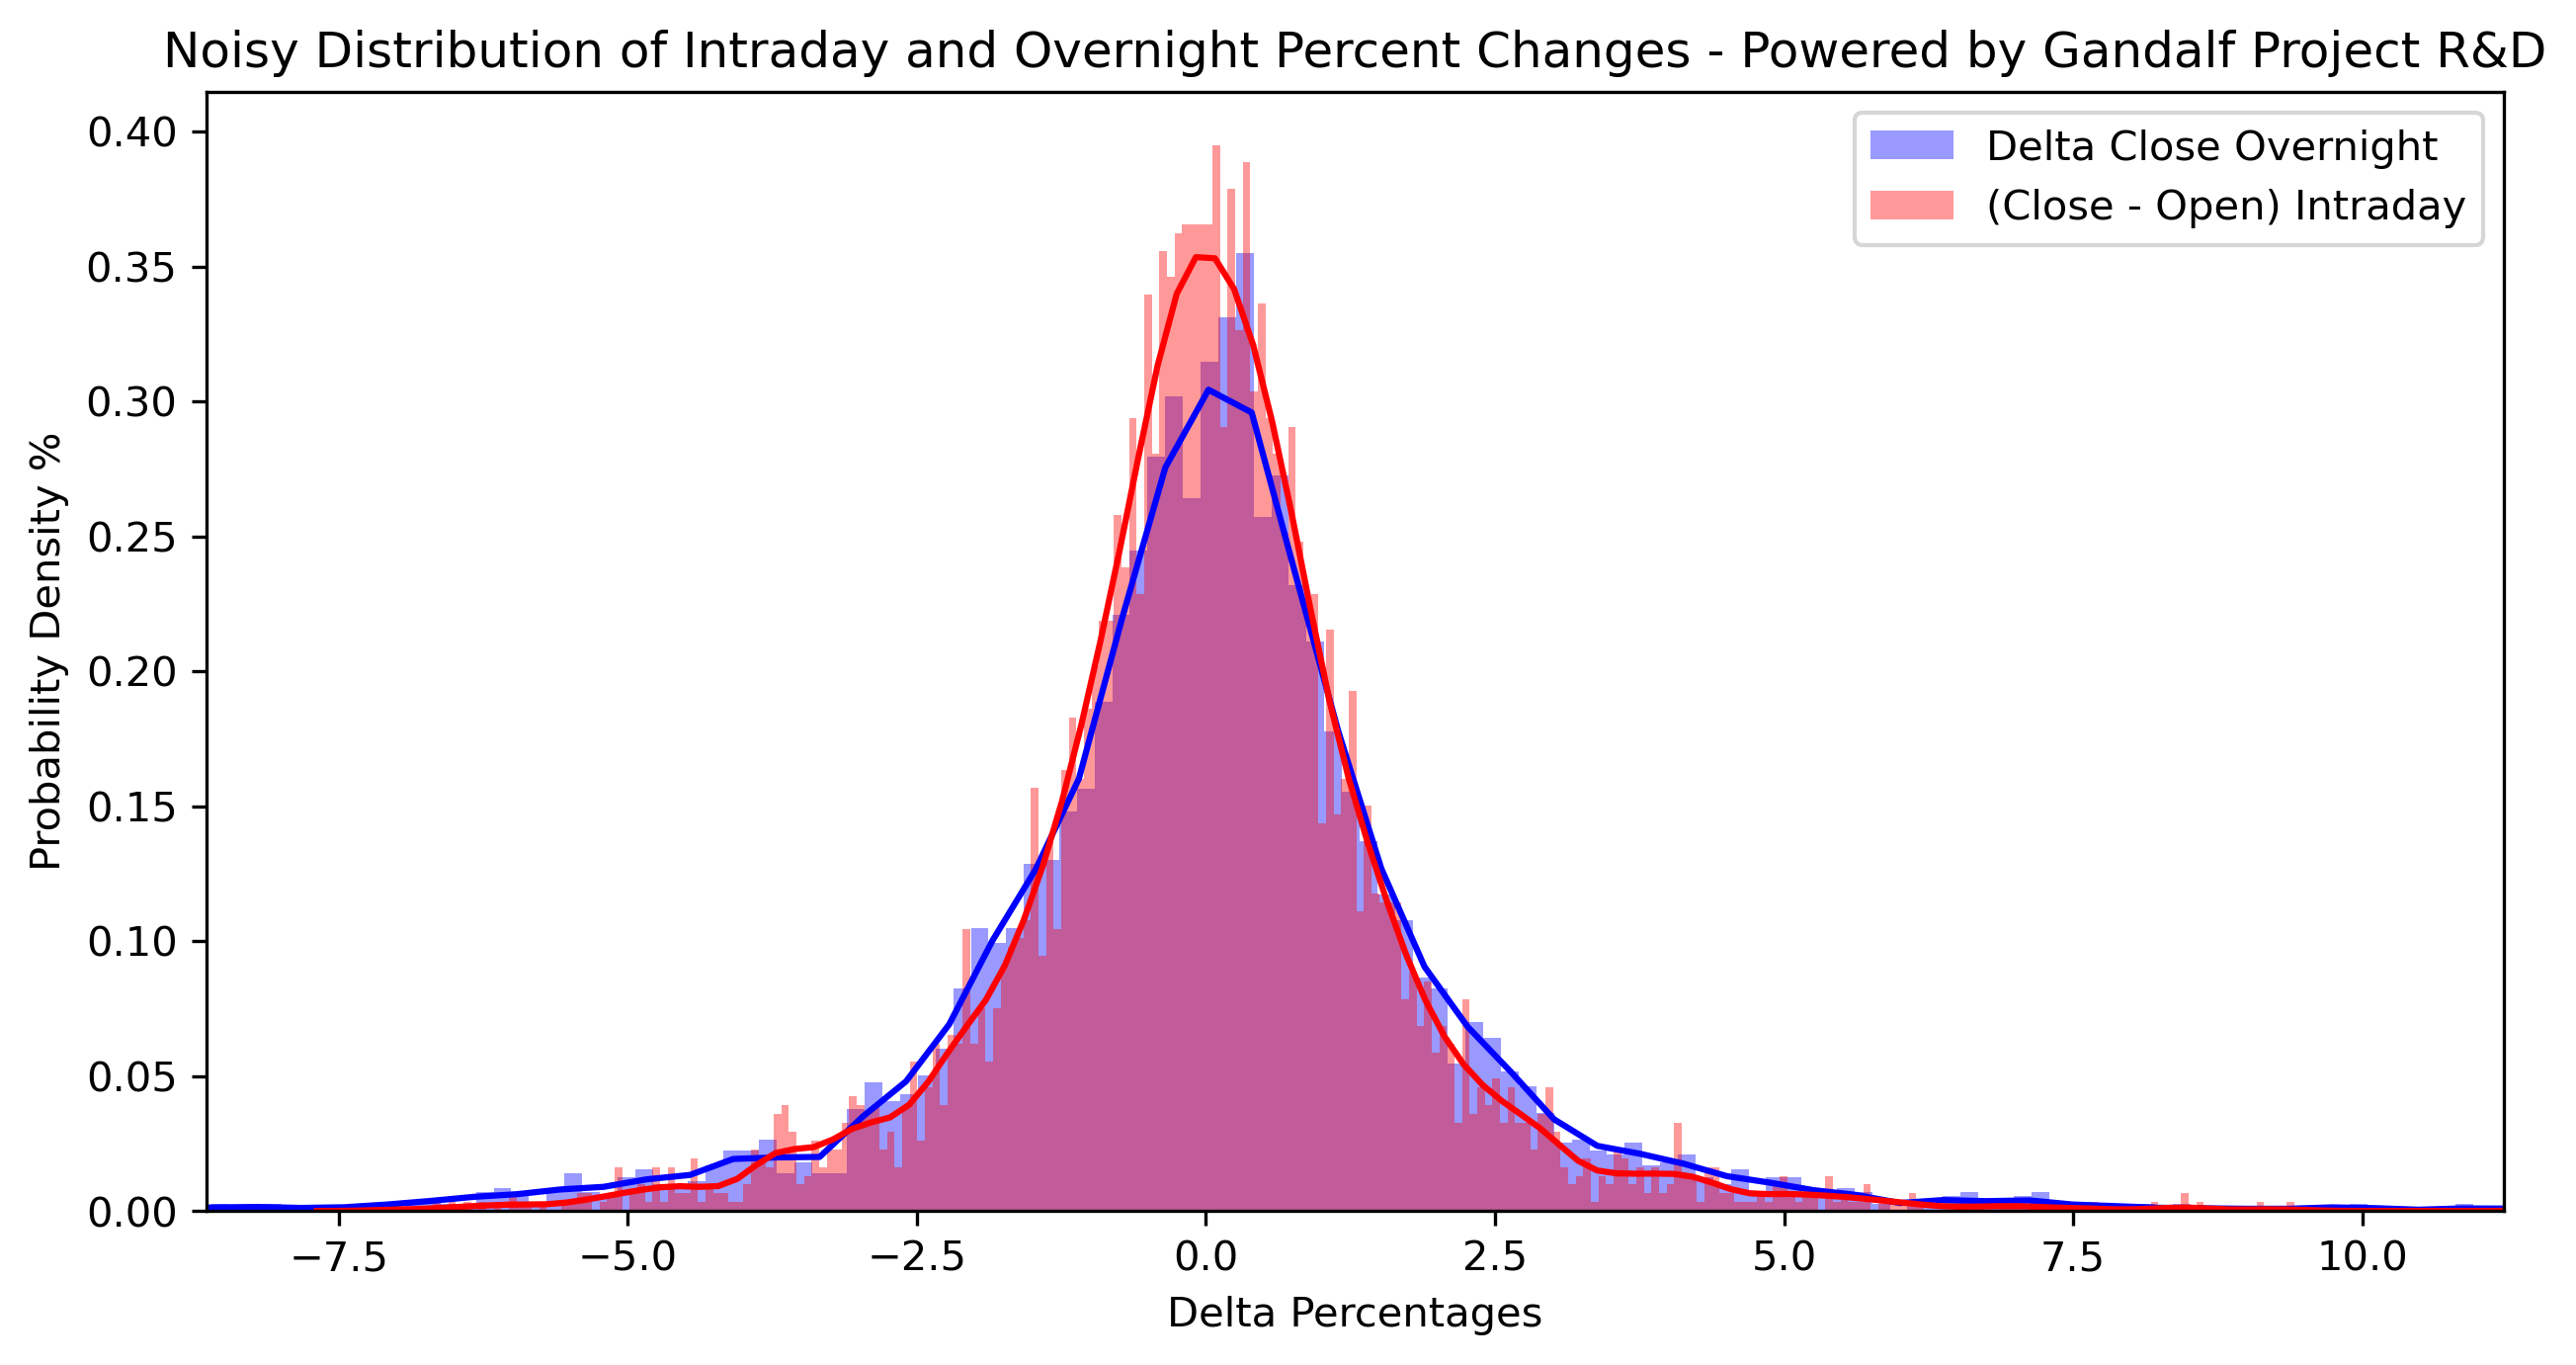

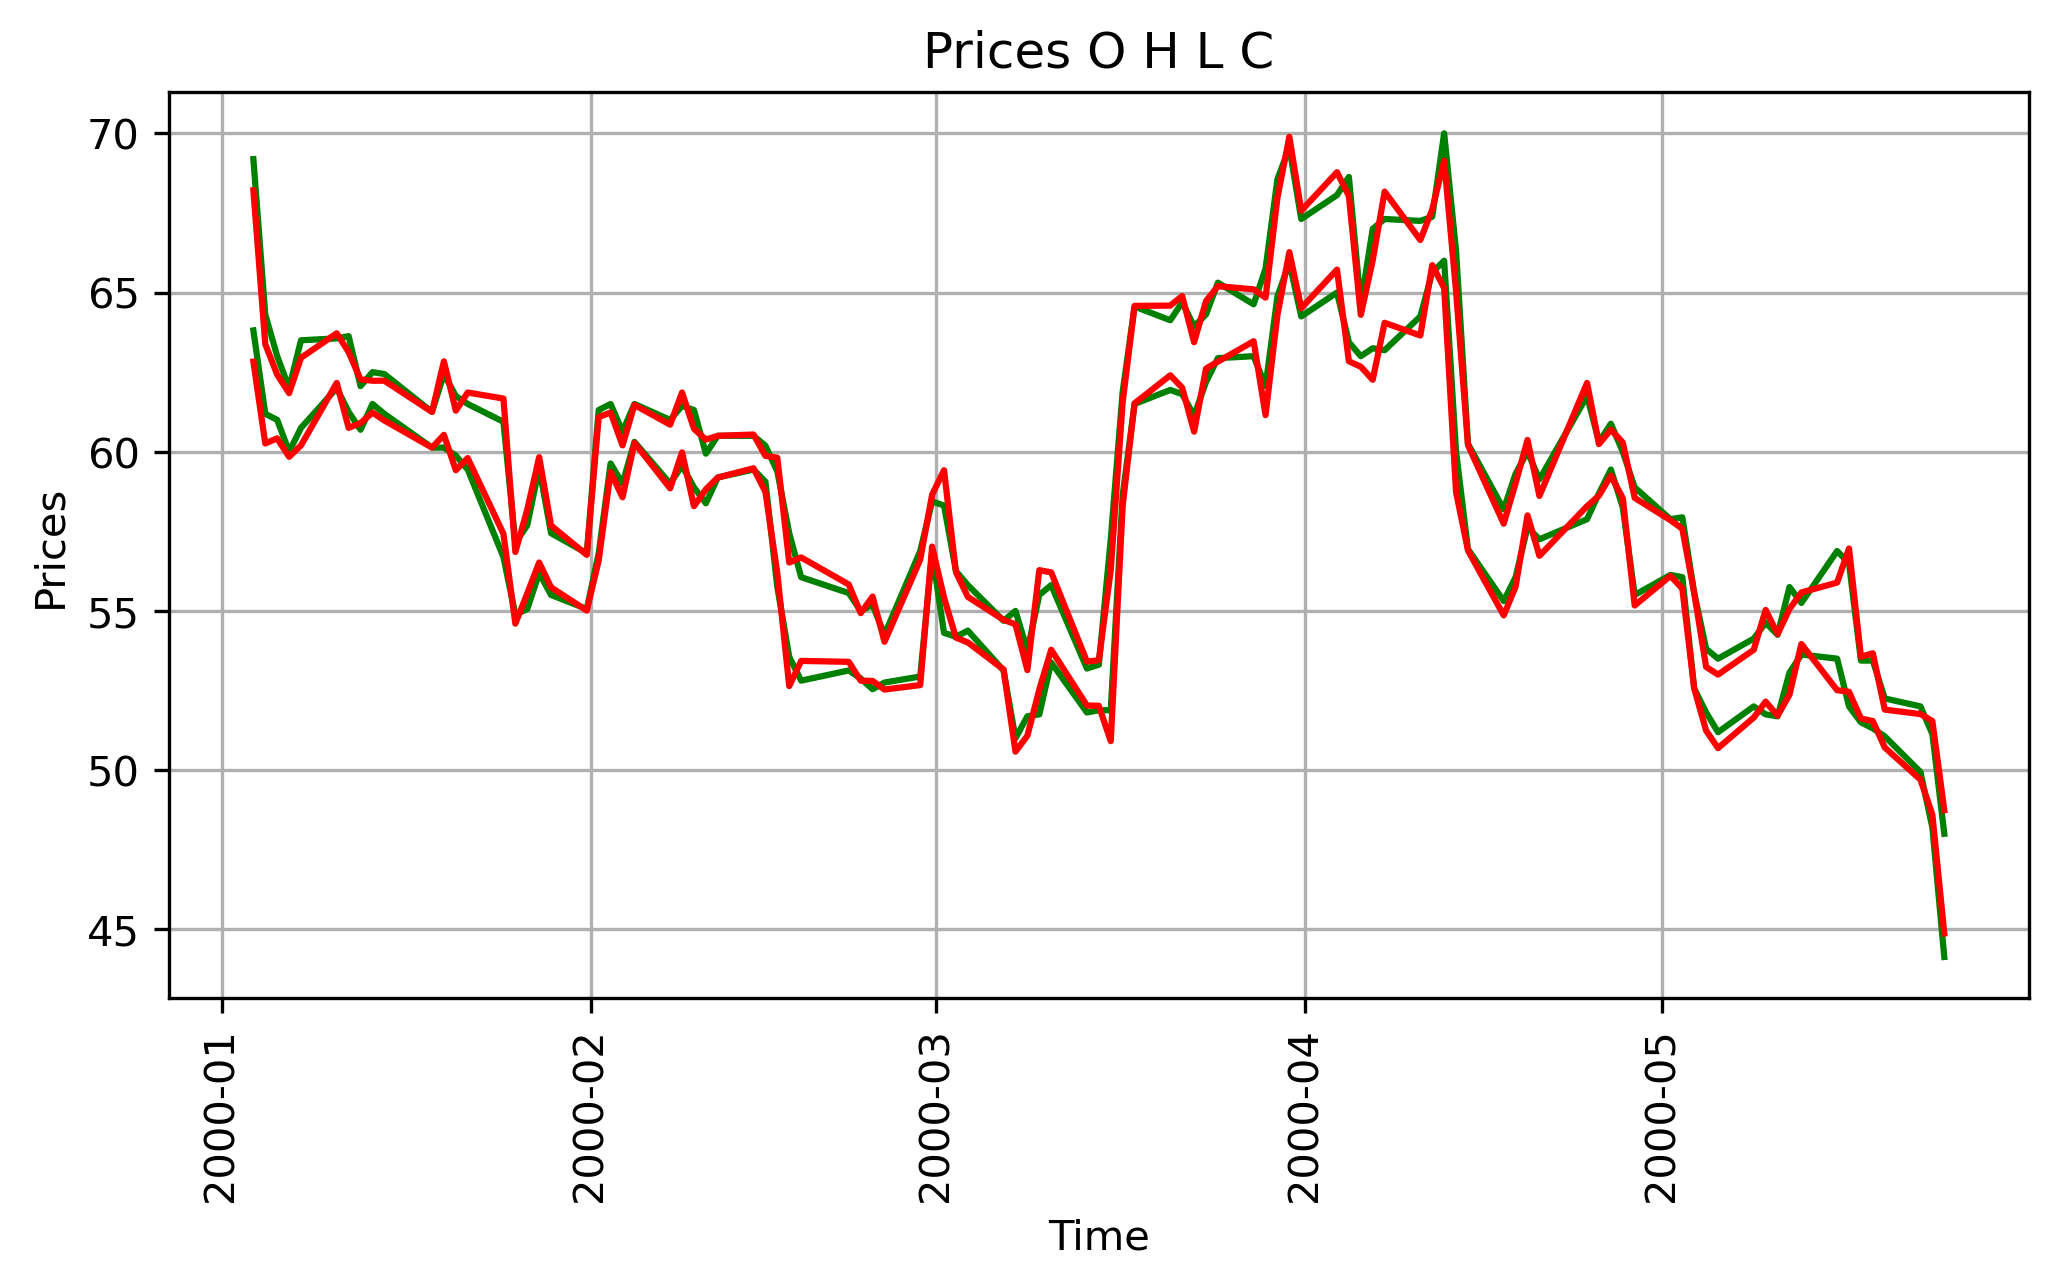


                     Noisy_Open  Noisy_High  Noisy_Low  Noisy_Close    Volume
Date_Time                                                                    
2000-01-03 16:00:00       67.88       68.44      63.06        64.44  12030600
2000-01-04 16:00:00       63.83       64.14      61.02        61.52   8722000
2000-01-05 16:00:00       62.15       63.40      61.40        62.40   6939800
2000-01-06 16:00:00       61.47       61.84      59.84        59.84   6607600
2000-01-07 16:00:00       60.96       62.71      59.96        62.71   6207300
2000-01-10 16:00:00       61.90       63.46      61.90        63.09   5455400
2000-01-11 16:00:00       63.68       63.87      61.49        61.80   4371600
2000-01-12 16:00:00       61.41       61.91      60.54        60.91   4629400
2000-01-13 16:00:00       62.30       62.67      61.67        62.30   4538900
2000-01-14 16:00:00       62.07       62.13      60.88        61.63   4578000

                       count          mean           std     m

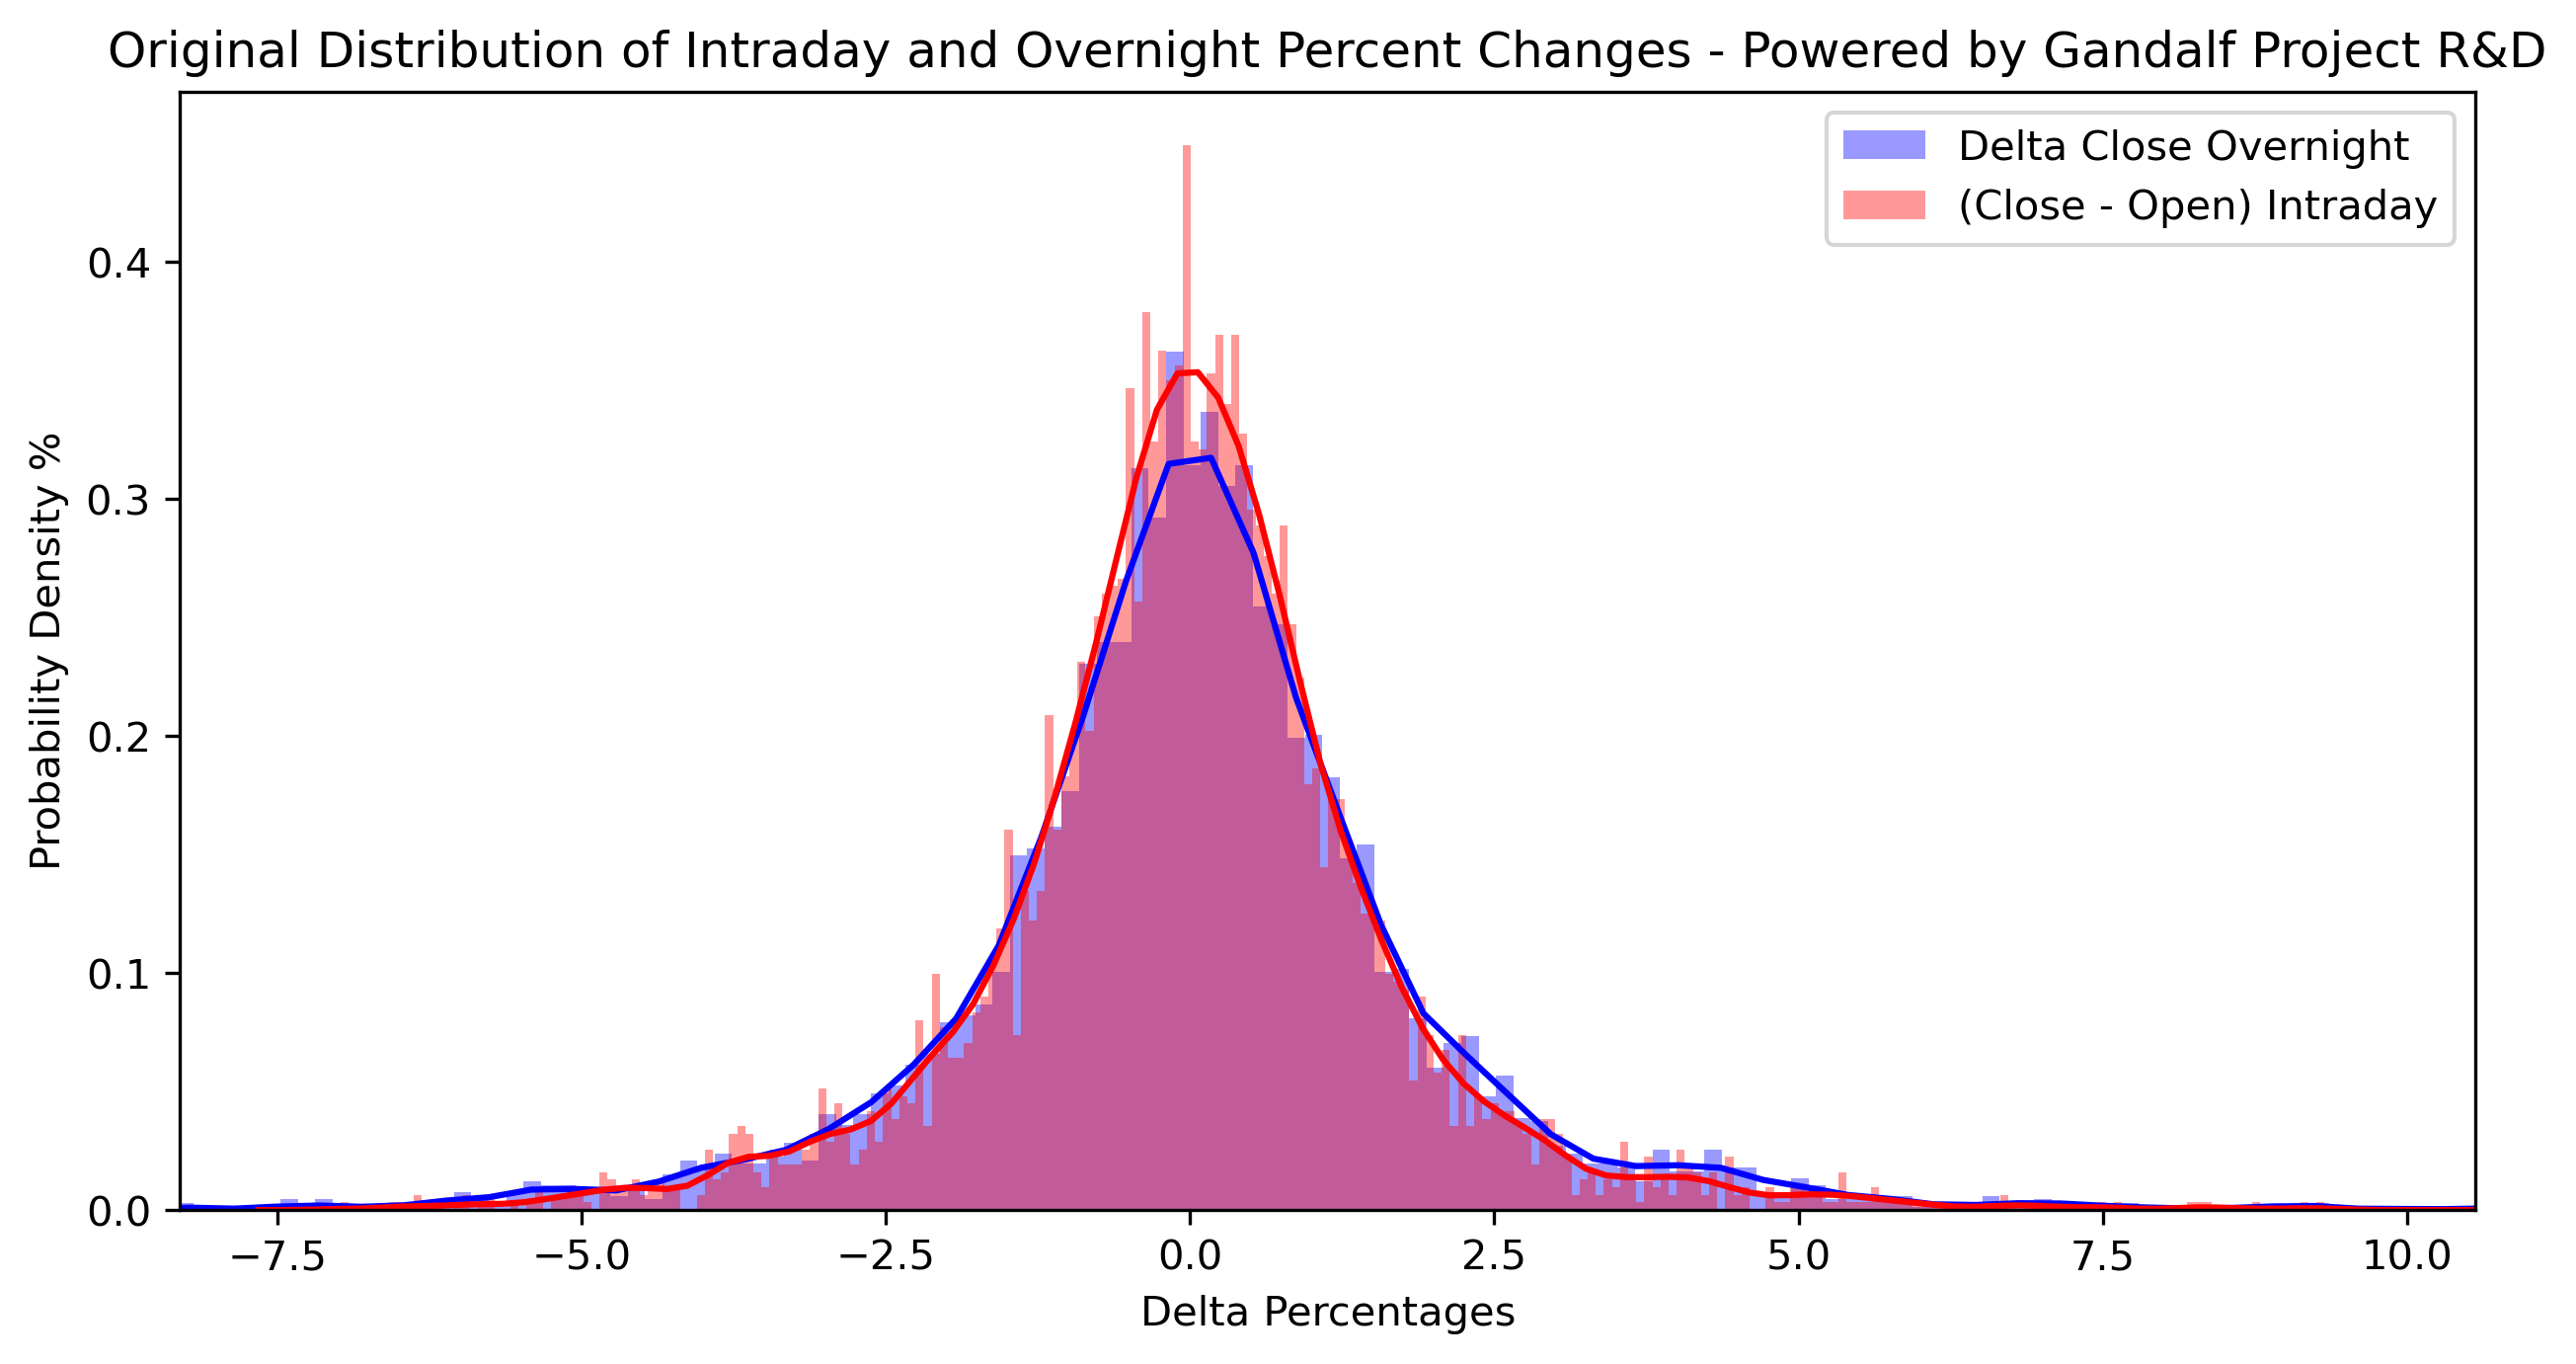

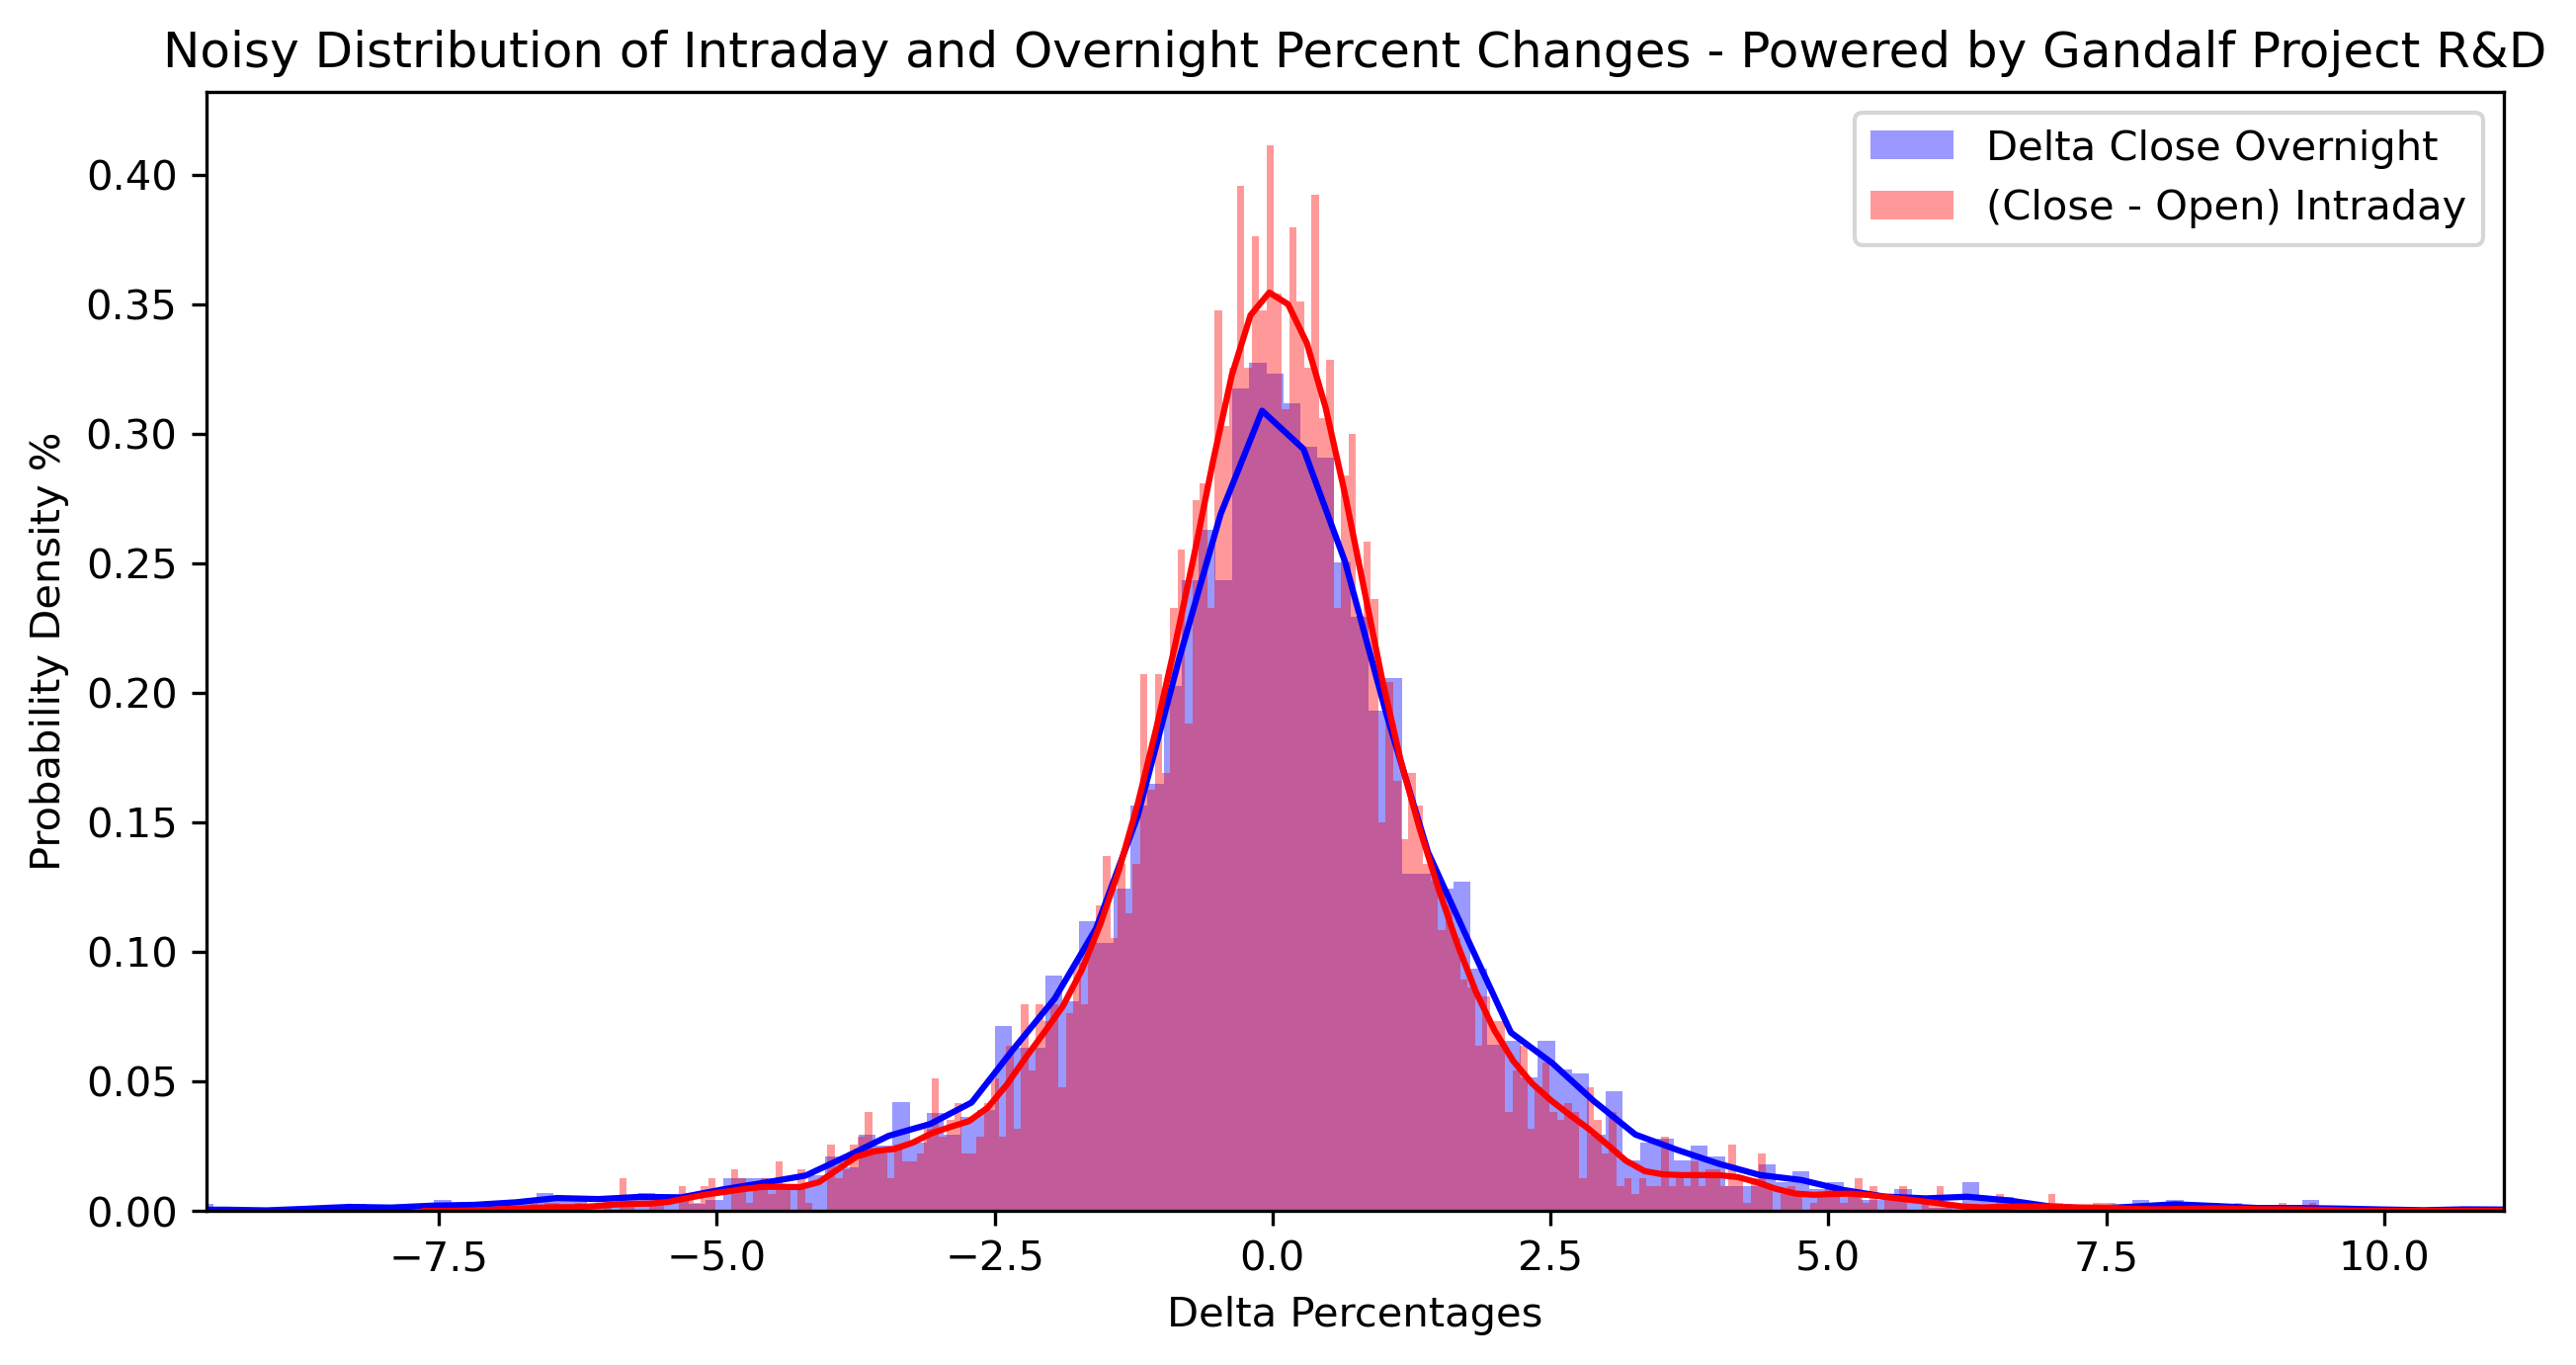

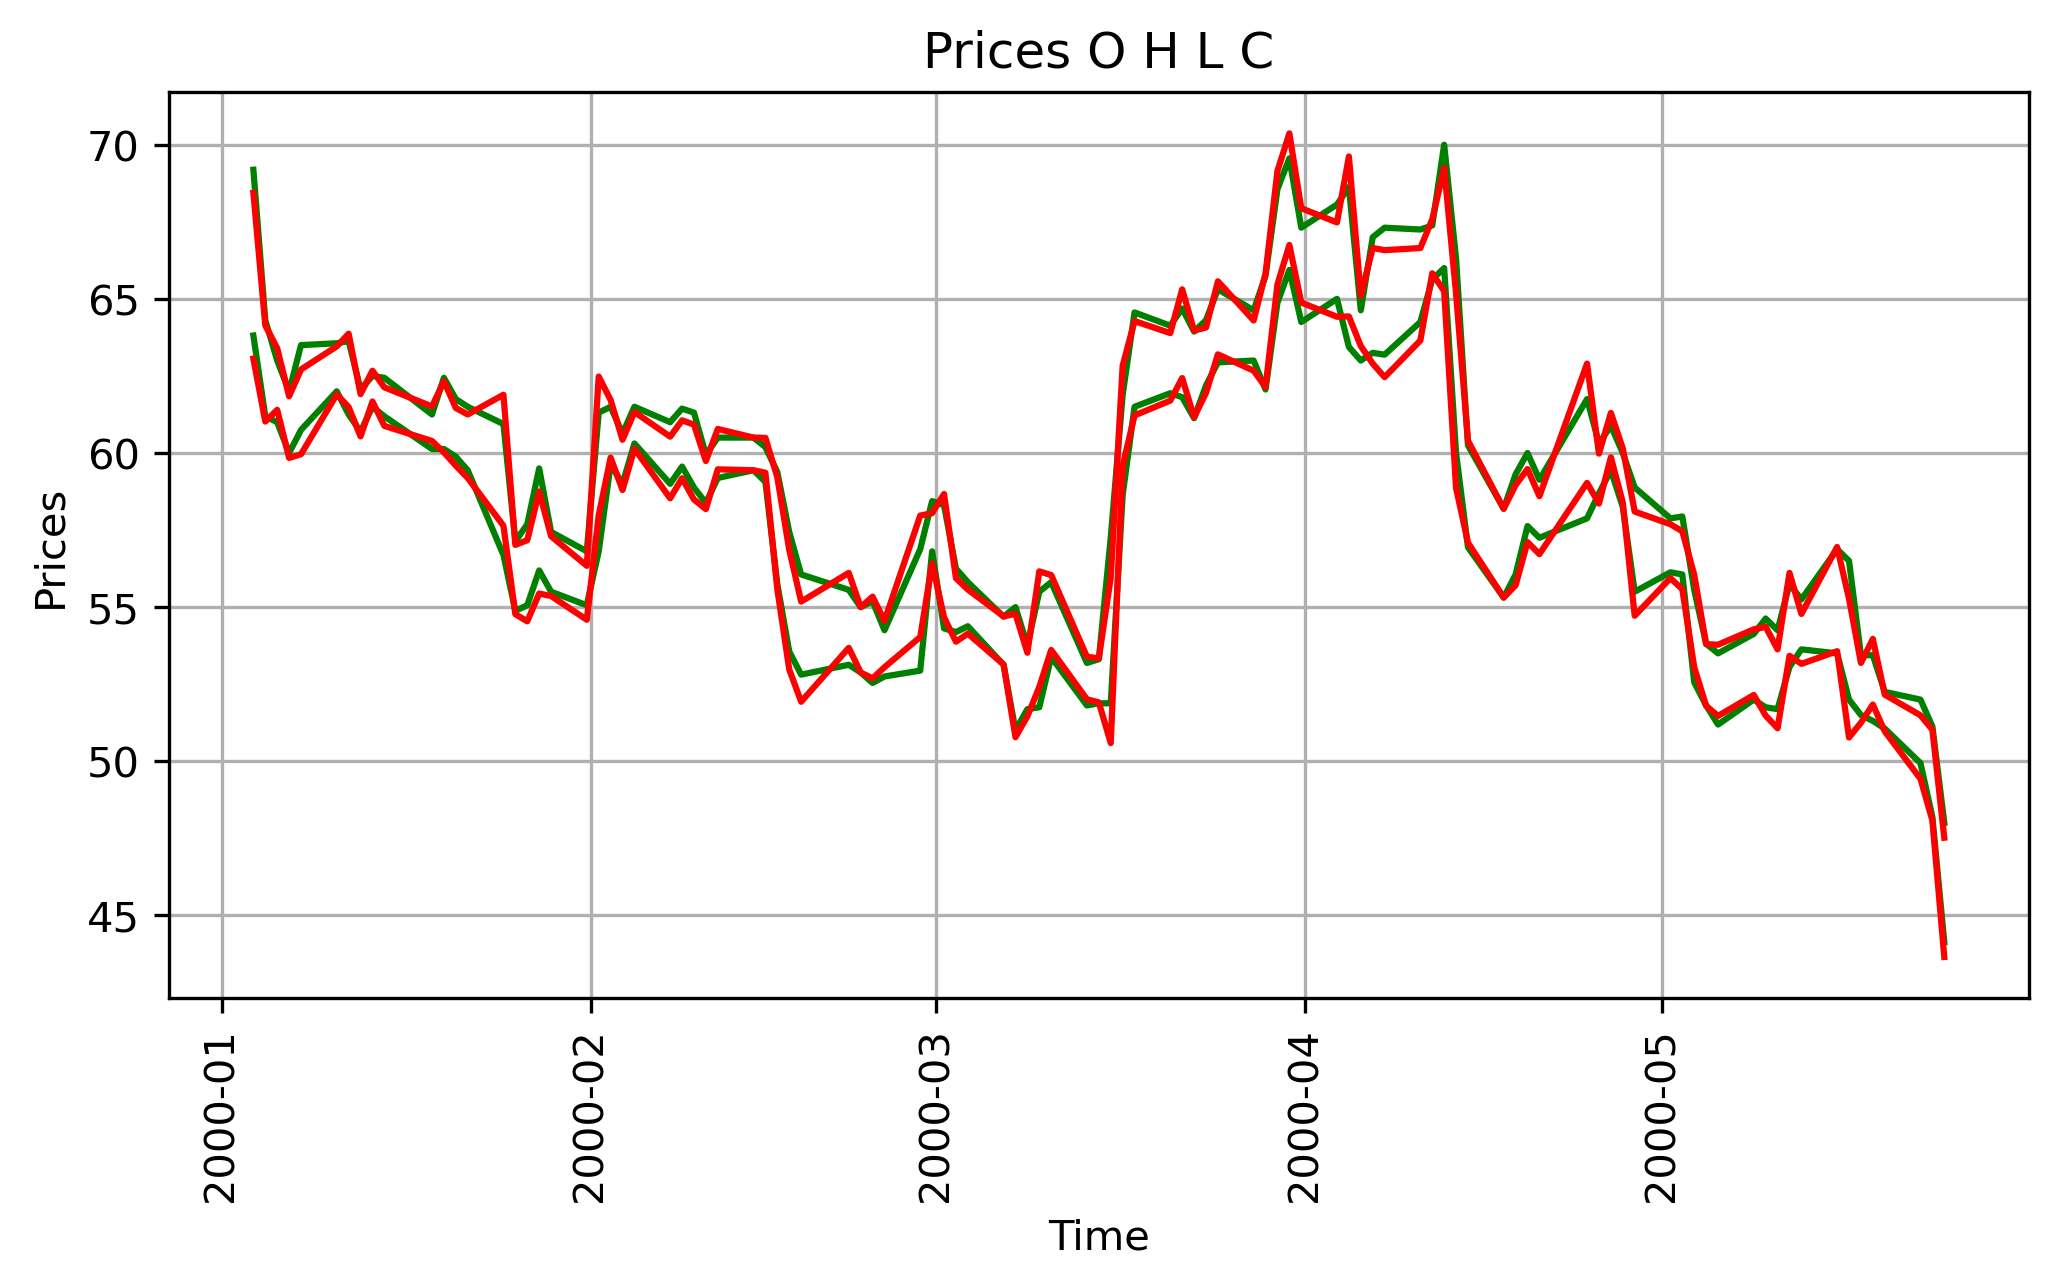


                     Noisy_Open  Noisy_High  Noisy_Low  Noisy_Close    Volume
Date_Time                                                                    
2000-01-03 16:00:00       69.49       70.05      64.67        66.05  12030600
2000-01-04 16:00:00       64.47       64.78      61.66        62.16   8722000
2000-01-05 16:00:00       62.16       63.41      61.41        62.41   6939800
2000-01-06 16:00:00       61.81       62.18      60.18        60.18   6607600
2000-01-07 16:00:00       61.63       63.38      60.63        63.38   6207300
2000-01-10 16:00:00       62.11       63.67      62.11        63.30   5455400
2000-01-11 16:00:00       63.85       64.04      61.66        61.97   4371600
2000-01-12 16:00:00       61.64       62.14      60.77        61.14   4629400
2000-01-13 16:00:00       61.96       62.33      61.33        61.96   4538900
2000-01-14 16:00:00       62.44       62.50      61.25        62.00   4578000

                       count          mean           std     m

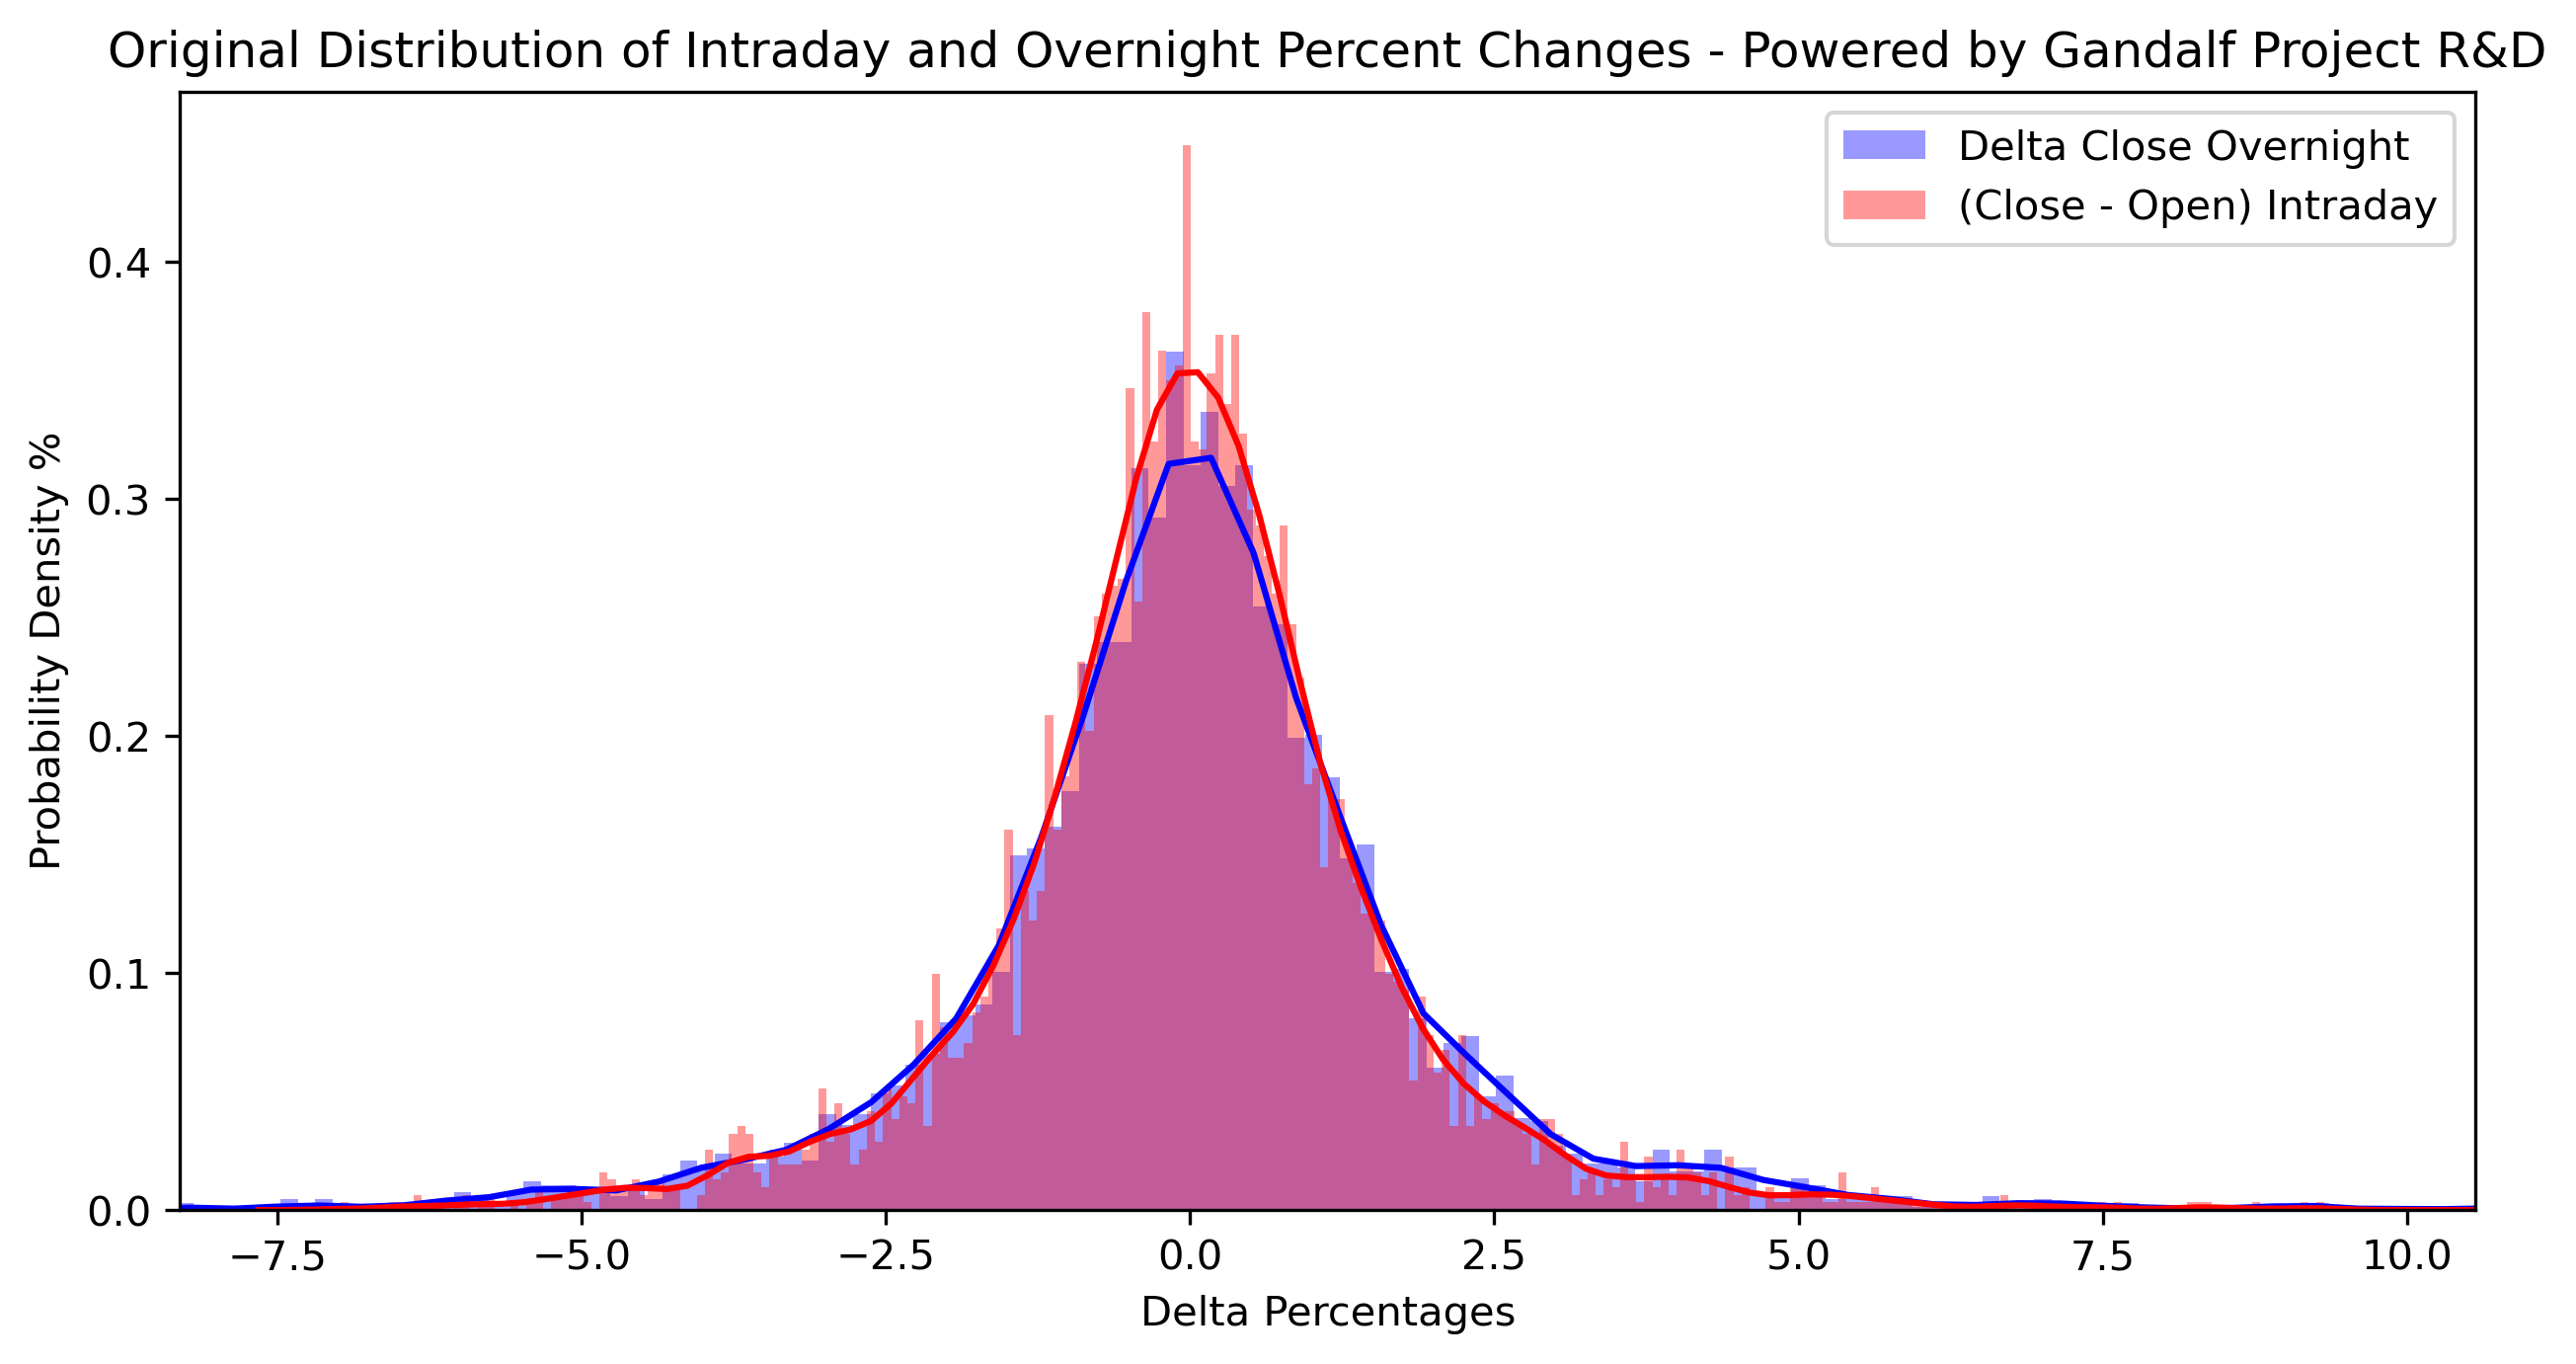

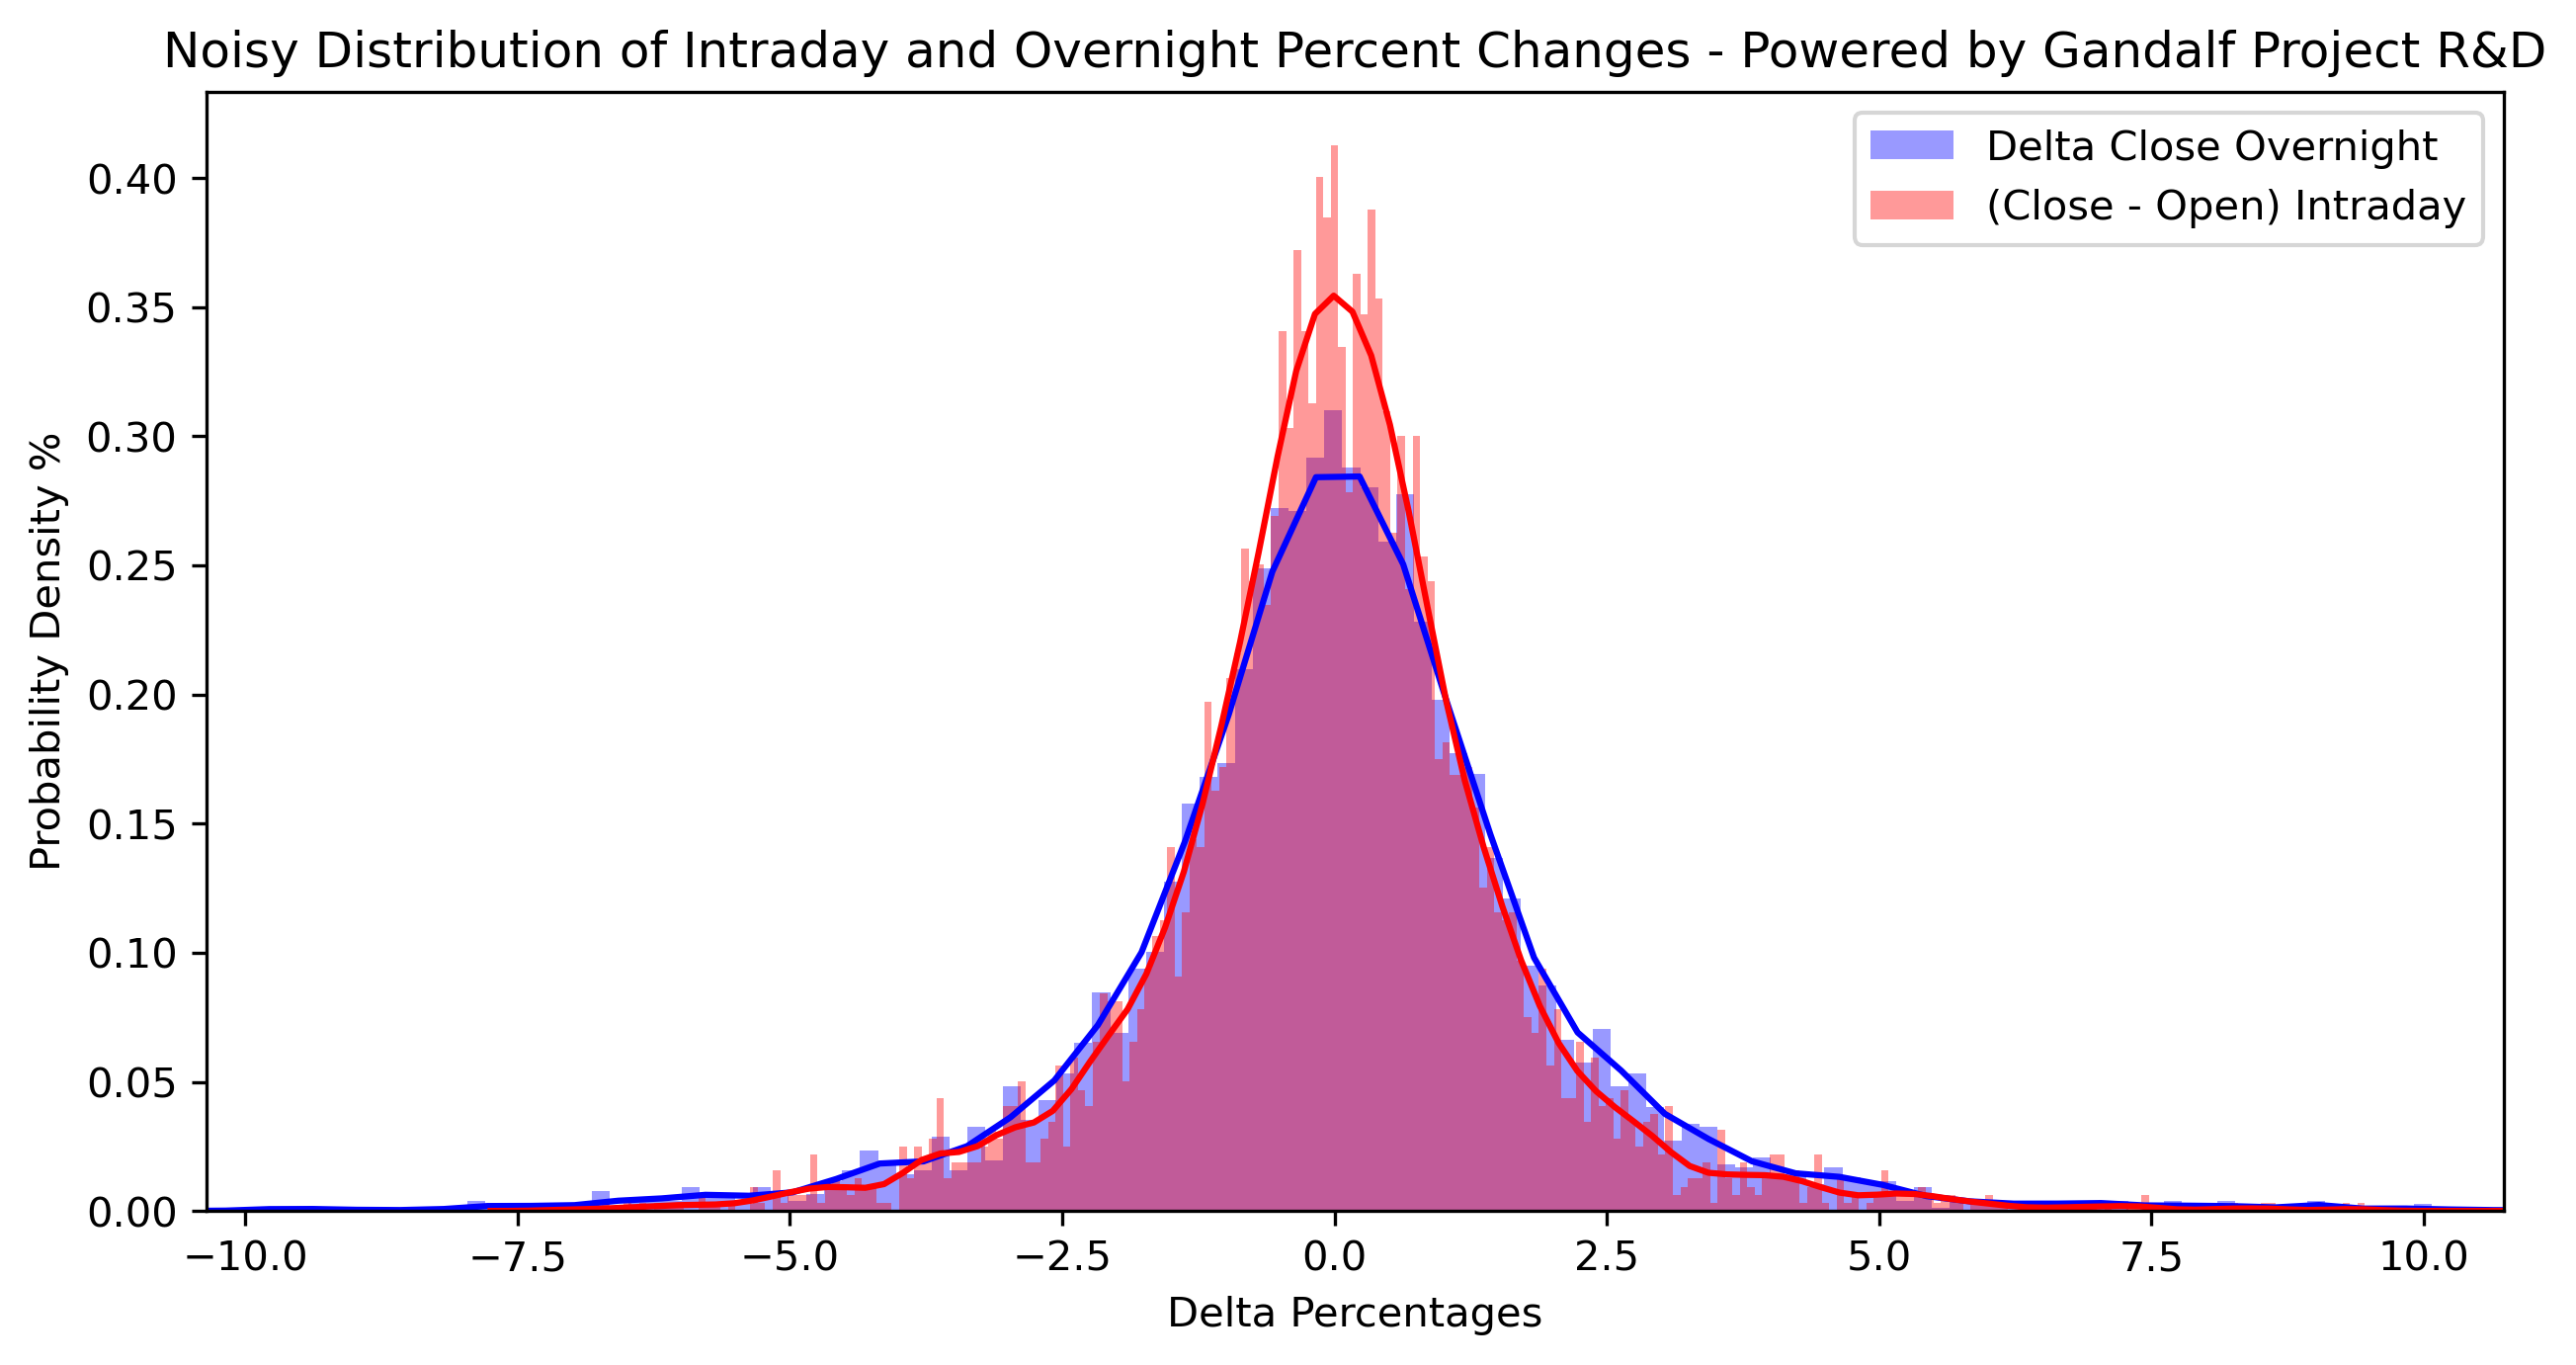

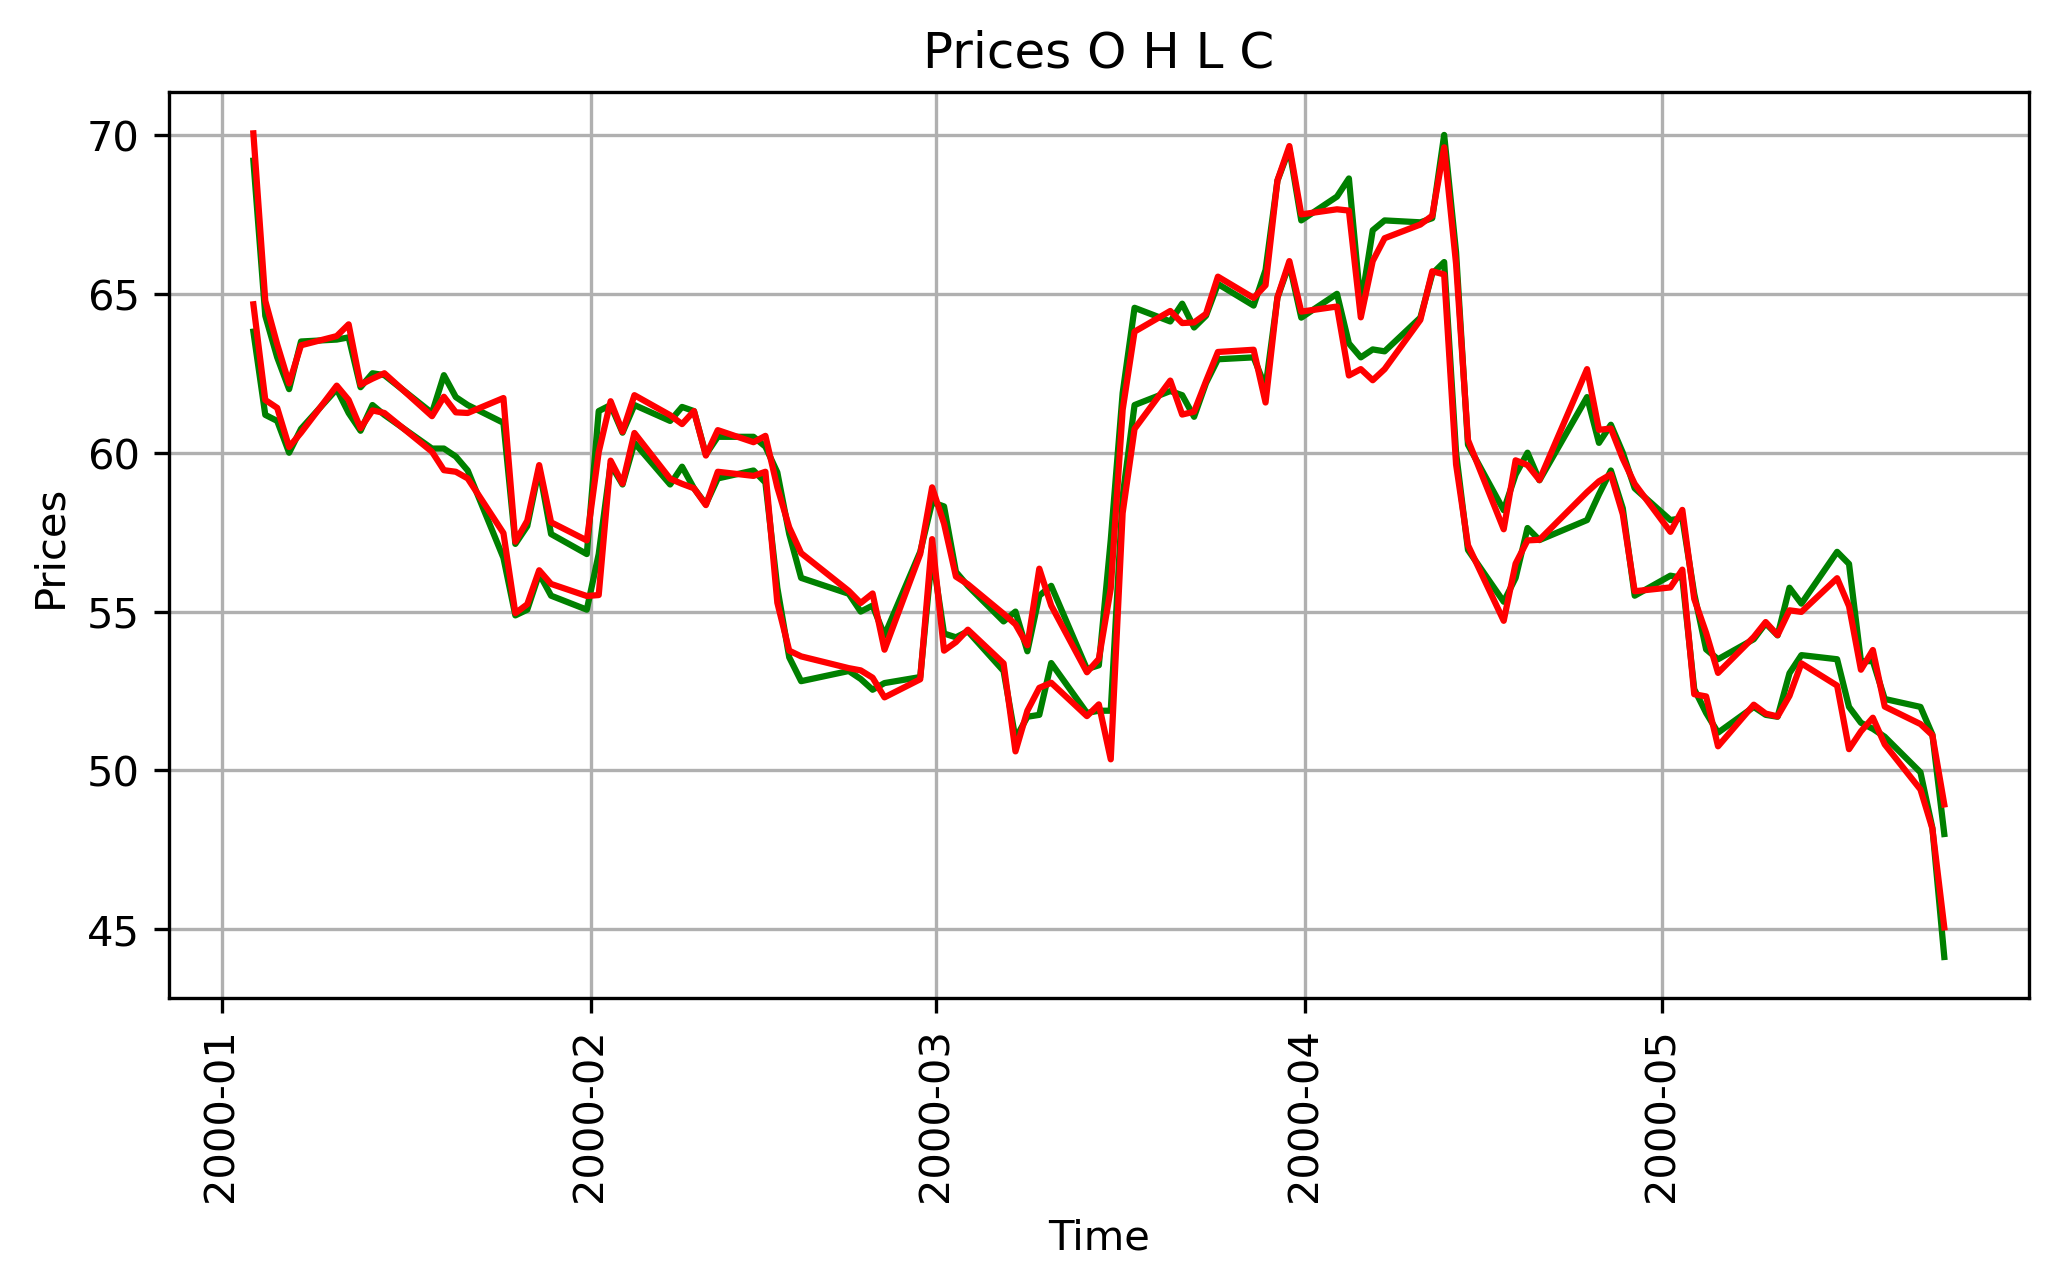

In [1]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

def single_noise_adder(array, single_range, percentage_noise_addiction):
    """
    Funzione che modifica ciascun elemento dell'array di ingresso mediante la formula:
    new_array[i] = array[i] + factor * percentage * range[i]
    """
    new_array = np.zeros(len(array))
    i = 0
    while i < len(array):
        factor = np.random.uniform(-1, 1)
        new_array[i] = round(float(array[i]) + factor * (float(percentage_noise_addiction) / 100) 
                             * abs(float(single_range[i])), 2)
        i += 1
    return new_array

def ohlc_noise_adder(O, H, L, C, percentage_noise_addiction):
    """
    Funzione che modifica ciascun elemento dell'array di ingresso mediante la formula:
    new_array[i] = array[i] + factor * percentage * range[i]
    """
    new_O = np.zeros(len(O))
    new_H = np.zeros(len(H))
    new_L = np.zeros(len(L))
    new_C = np.zeros(len(C))
    i = 0
    while i < len(O):
        factor = np.random.uniform(-1, 1)
        single_range = H[i] - L[i]
        new_O[i] = round(float(O[i]) + factor * (float(percentage_noise_addiction) / 100) 
                         * abs(float(single_range)), 2)
        new_H[i] = round(float(H[i]) + factor * (float(percentage_noise_addiction) / 100) 
                             * abs(float(single_range)), 2)
        new_L[i] = round(float(L[i]) + factor * (float(percentage_noise_addiction) / 100) 
                             * abs(float(single_range)), 2)
        new_C[i] = round(float(C[i]) + factor * (float(percentage_noise_addiction) / 100) 
                             * abs(float(single_range)), 2)
        #print(new_O[i],new_H[i],new_L[i],new_C[i])
        app = [new_O[i],new_H[i],new_L[i],new_C[i]]
        app.sort()
        #print(app)
        new_O[i] = new_O[i]
        new_H[i] = app[-1]
        new_L[i] = app[0]
        new_C[i] = new_C[i]
        #print("new:",new_O[i],new_H[i],new_L[i],new_C[i])
        i += 1
    return new_O, new_H, new_L, new_C
    
# INPUTS **********************************************************************************************************

numberofcopies = 3

noisePercent = 30

filename = "HD_Daily.txt"

startDate = "20000101"
endDate = "20180810"

# INPUTS **********************************************************************************************************

startDateParsed = datetime.date(int(startDate[0:4]), int(startDate[4:6]), int(startDate[6:]))
endDateParsed = datetime.date(int(endDate[0:4]), int(endDate[4:6]), int(endDate[6:]))

instrument = pd.read_csv(filename, 
                   usecols=['Date','Time','Open','High','Low','Close','Vol'], parse_dates=[['Date', 'Time']])
print("Il file contiene", len(instrument), "record")
instrument.index = instrument['Date_Time']
instrument.drop('Date_Time',axis=1,inplace=True)
instrument['AvgPrice'] = round(instrument.iloc[:,0:4].mean(axis=1),2)
instrument['Range'] = round(instrument['High'] - instrument['Low'],2)
instrument['Body'] = abs(instrument['Open'] - instrument['Close'])
instrument['OpenClose'] = round((instrument['Close'] - instrument['Open']),2)
instrument['OpenClosePerc'] = round((instrument['Close'] - instrument['Open']) / instrument['Open'] * 100,2)
instrument['DeltaClosePerc'] = round((instrument['Close'] - instrument['Close'].shift(1)) / instrument['Close'].shift(1) * 100,2)

instrument = instrument.loc[startDateParsed:endDateParsed]
print(instrument[['Open','High','Low','Close','Vol']].head(10))

print("")
print(instrument.describe(percentiles = [0.01,0.05,0.10,0.25,0.50,0.75,0.90,0.95,0.99]).transpose())

for times in range(numberofcopies):
    stream = ohlc_noise_adder(instrument['Open'],
                              instrument['High'],
                              instrument['Low'],
                              instrument['Close'],
                              noisePercent)

    new_instrument = instrument.copy()
    new_instrument = new_instrument.drop(new_instrument.columns[[0,1,2,3,4,5,6,7,8,9,10]], axis=1)
    new_instrument['Noisy_Open'] = stream[0]
    new_instrument['Noisy_High'] = stream[1]
    new_instrument['Noisy_Low'] = stream[2]
    new_instrument['Noisy_Close'] = stream[3]
    new_instrument['Volume'] = instrument['Vol']
    new_instrument['Noisy_OpenClosePerc'] = round((new_instrument['Noisy_Close'] - new_instrument['Noisy_Open']) 
                                                  / new_instrument['Noisy_Open'] * 100,2)
    new_instrument['Noisy_DeltaClosePerc'] = round((new_instrument['Noisy_Close'] - new_instrument['Noisy_Close'].shift(1)) 
                                                   / new_instrument['Noisy_Close'].shift(1) * 100,2)

    print("")
    print(new_instrument[['Noisy_Open','Noisy_High','Noisy_Low','Noisy_Close','Volume']].head(10))

    print("")
    print(new_instrument.describe([0.01,0.05,0.10,0.25,0.50,0.75,0.90,0.95,0.99]).transpose())

    new_filename = "NoiseAddictedSerie" + str(times) + ".csv"
    new_instrument.to_csv(new_filename,index=True)

    print("")
    print('Serie addizionata di rumore (+/-',noisePercent,'% max del range di barra).')
    print('File',new_filename,'esportato!')

    # MODULO GRAFICO **************************************************************************************************

    # codice per limitare automaticamente il grafico della distribuzione
    a = np.array(instrument['DeltaClosePerc'].dropna(0))
    b = np.array(instrument['OpenClosePerc'].dropna(0))
    p1 = np.percentile(a, 99.9)
    p2 = np.percentile(a, 99.9)
    m1 = np.percentile(a, 0.1)
    m2 = np.percentile(a, 0.1)
    maxsns = max(p1,p2)
    minsns = min(m1,m2)
    #print(p1,p2)
    #print(m1,m2)
    #print(maxsns,minsns)

    plt.figure(figsize=(10,5),dpi=300)
    sns.distplot(instrument['DeltaClosePerc'].dropna(), bins=300, color='b', label='Delta Close Overnight')
    sns.distplot(instrument['OpenClosePerc'].dropna(), bins=300, color='r', label='(Close - Open) Intraday')
    plt.xlim(xmin = minsns, xmax = maxsns)
    plt.title("Original Distribution of Intraday and Overnight Percent Changes - Powered by Gandalf Project R&D")
    plt.xlabel("Delta Percentages")
    plt.ylabel("Probability Density %")
    plt.legend()
    plt.show()

    # codice per limitare automaticamente il grafico della distribuzione
    a = np.array(new_instrument['Noisy_DeltaClosePerc'].dropna(0))
    b = np.array(new_instrument['Noisy_OpenClosePerc'].dropna(0))
    np1 = np.percentile(a, 99.9)
    np2 = np.percentile(a, 99.9)
    nm1 = np.percentile(a, 0.1)
    nm2 = np.percentile(a, 0.1)
    nmaxsns = max(np1,np2)
    nminsns = min(nm1,nm2)
    #print(p1,p2)
    #print(m1,m2)
    #print(maxsns,minsns)

    plt.figure(figsize=(10,5),dpi=300)
    sns.distplot(new_instrument['Noisy_DeltaClosePerc'].dropna(), bins=300, color='b', label='Delta Close Overnight')
    sns.distplot(new_instrument['Noisy_OpenClosePerc'].dropna(), bins=300, color='r', label='(Close - Open) Intraday')
    plt.xlim(xmin = nminsns, xmax = nmaxsns)
    plt.title("Noisy Distribution of Intraday and Overnight Percent Changes - Powered by Gandalf Project R&D")
    plt.xlabel("Delta Percentages")
    plt.ylabel("Probability Density %")
    plt.legend()
    plt.show()

    plt.figure(figsize=(8,4), dpi=300)

    #plt.plot(instrument['Open'][:100], color='green')
    plt.plot(instrument['High'][:100], color='green')
    plt.plot(instrument['Low'][:100], color='green')
    #plt.plot(instrument['Close'][:100], color='green')

    #plt.plot(new_instrument['Noisy_Open'][:100], color='red')
    plt.plot(new_instrument['Noisy_High'][:100], color='red')
    plt.plot(new_instrument['Noisy_Low'][:100], color='red')
    #plt.plot(new_instrument['Noisy_Close'][:100], color='red')

    plt.xlabel("Time")
    plt.ylabel("Prices")
    plt.title('Prices O H L C')
    plt.xticks(rotation='vertical')
    plt.grid(True)
    #plt.legend()
    plt.show()

    # MODULO GRAFICO **************************************************************************************************

# Caso Intraday: CODICE #2

Il file contiene 68568 record
                       Open    High     Low   Close  Volume
Date_Time                                                  
2007-01-01 19:00:00  129.82  129.84  129.82  129.84       2
2007-01-01 19:00:00  129.82  129.89  129.68  129.68      97
2007-01-01 20:00:00  129.72  129.74  129.63  129.63      81
2007-01-01 21:00:00  129.68  129.69  129.59  129.61      74
2007-01-01 22:00:00  129.64  129.69  129.61  129.61      84
2007-01-01 23:00:00  129.64  129.64  129.43  129.44     406
2007-01-02 00:00:00  129.47  129.47  129.34  129.41     436
2007-01-02 01:00:00  129.41  129.56  129.40  129.56     103
2007-01-02 02:00:00  129.56  129.59  129.54  129.55      80
2007-01-02 03:00:00  129.59  129.68  129.59  129.68      96

                  count          mean           std    min      1%      5%  \
Open            68551.0    103.672641     36.130396  39.42  44.330   48.90   
High            68551.0    103.870684     36.176274  39.78  44.530   49.02   
Low            

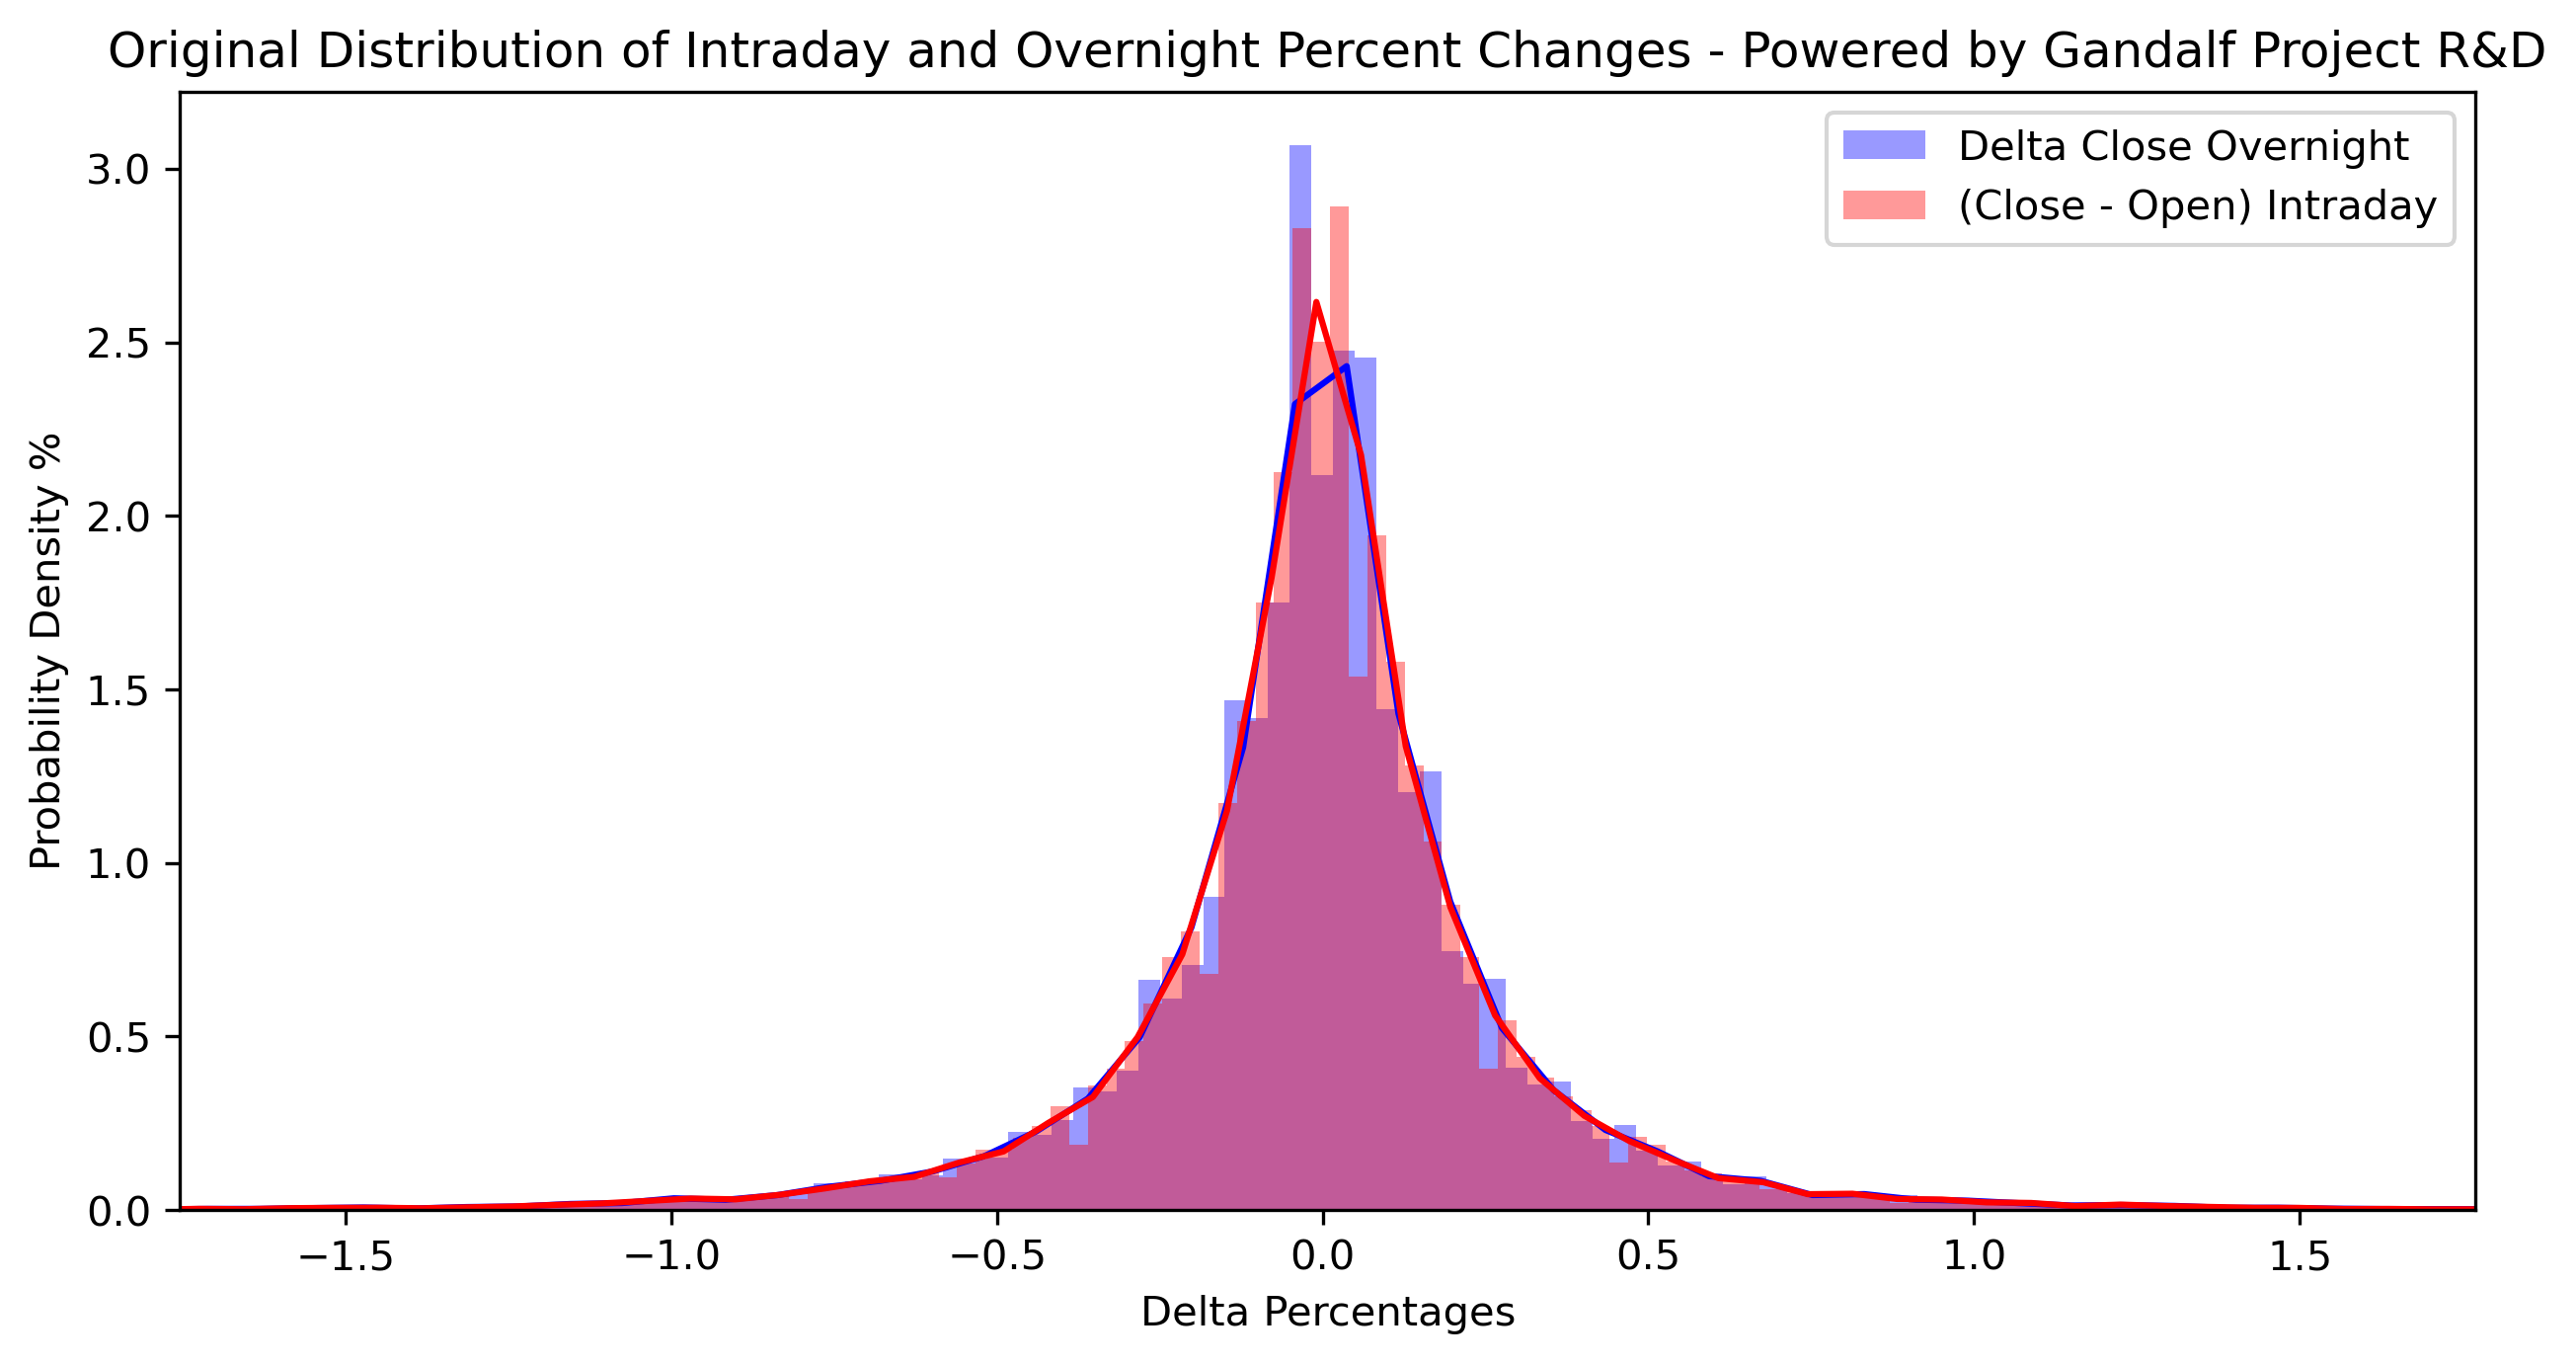

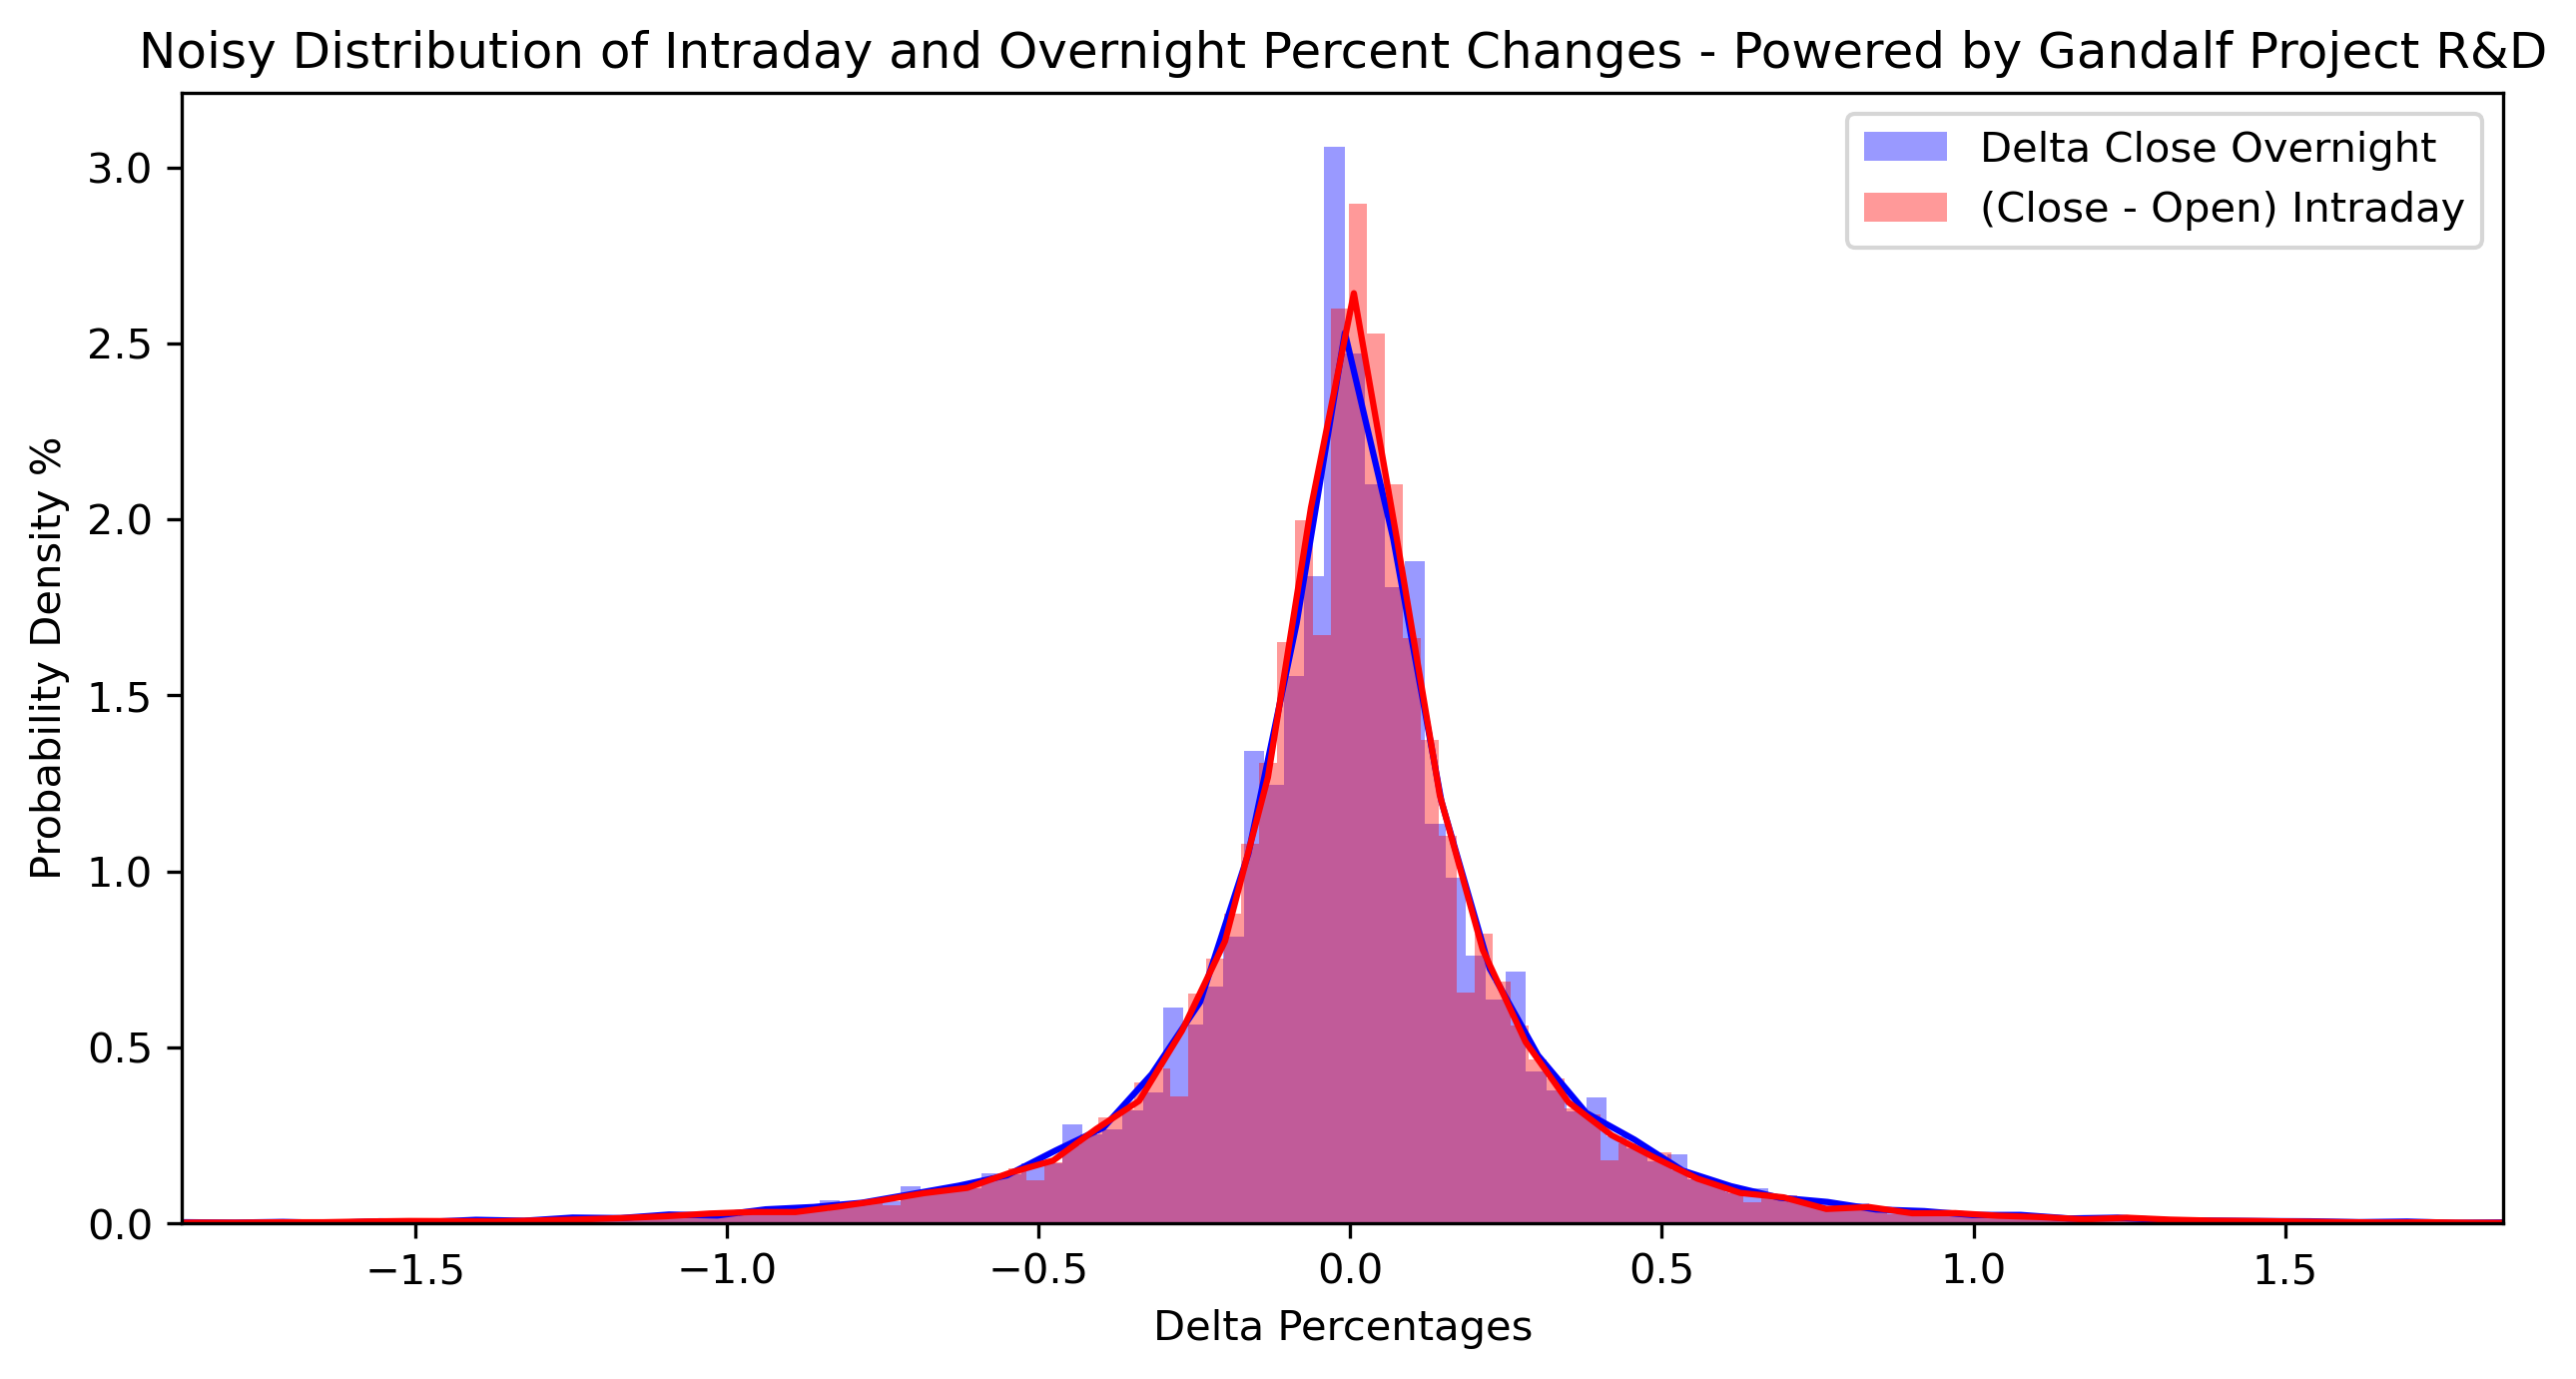

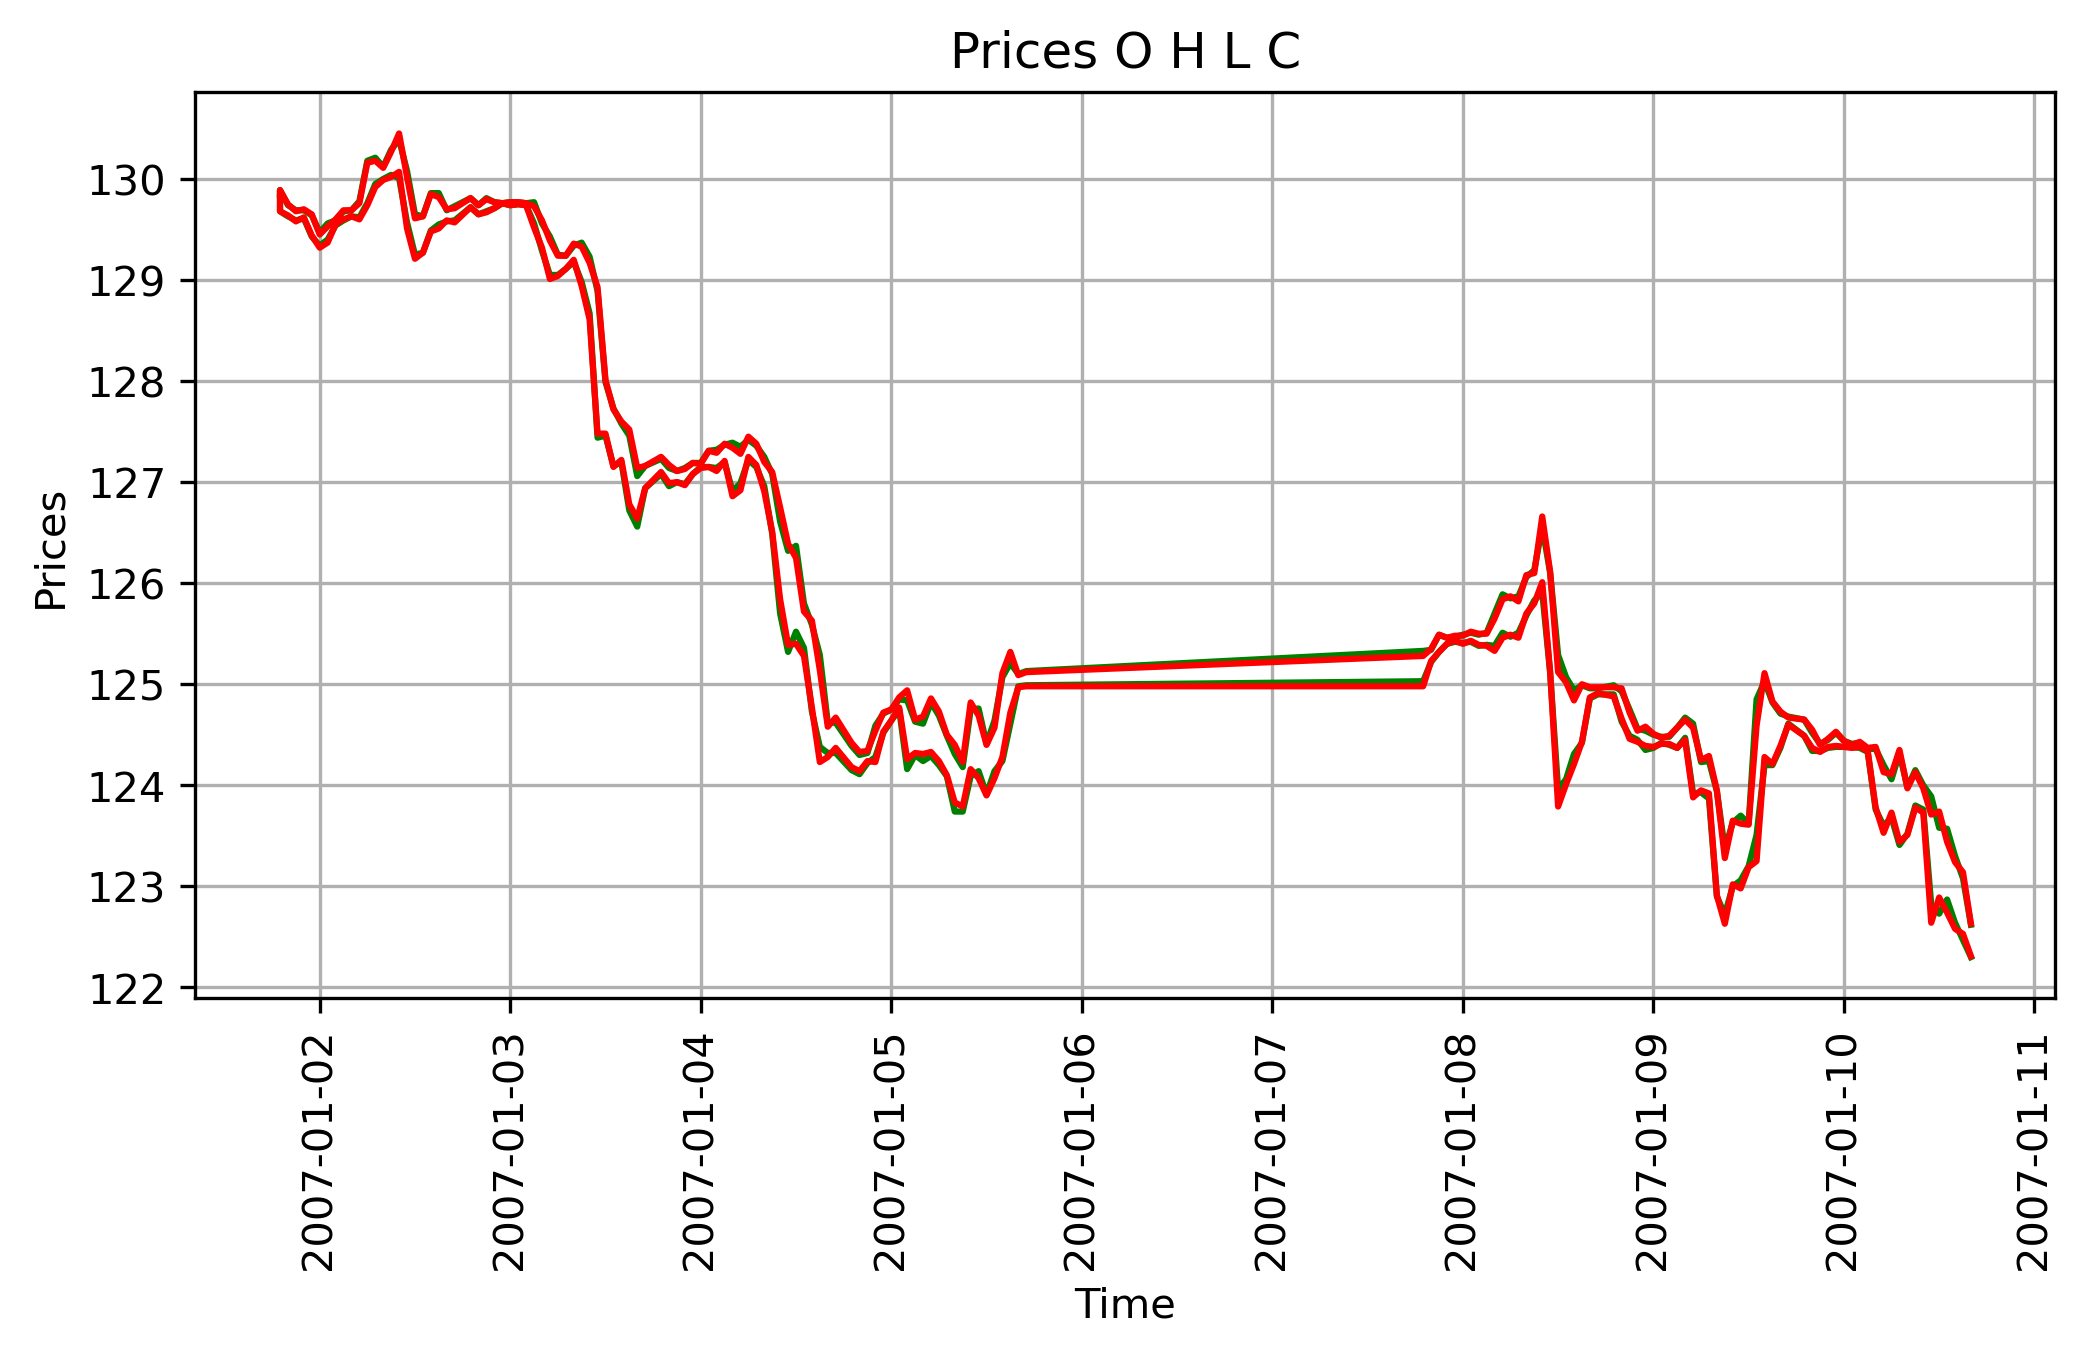


Serie addizionata di rumore (+/- 20 % max del range di barra).
File NoiseAddictedSerie0.csv esportato!

                     Noisy_Open  Noisy_High  Noisy_Low  Noisy_Close  Volume
Date_Time                                                                  
2007-01-01 19:00:00      129.82      129.84     129.82       129.84       2
2007-01-01 19:00:00      129.78      129.85     129.64       129.64      97
2007-01-01 20:00:00      129.71      129.73     129.62       129.62      81
2007-01-01 21:00:00      129.69      129.70     129.60       129.62      74
2007-01-01 22:00:00      129.64      129.69     129.61       129.61      84
2007-01-01 23:00:00      129.67      129.67     129.46       129.47     406
2007-01-02 00:00:00      129.48      129.48     129.35       129.42     436
2007-01-02 01:00:00      129.43      129.58     129.42       129.58     103
2007-01-02 02:00:00      129.55      129.58     129.53       129.54      80
2007-01-02 03:00:00      129.59      129.68     129.59     

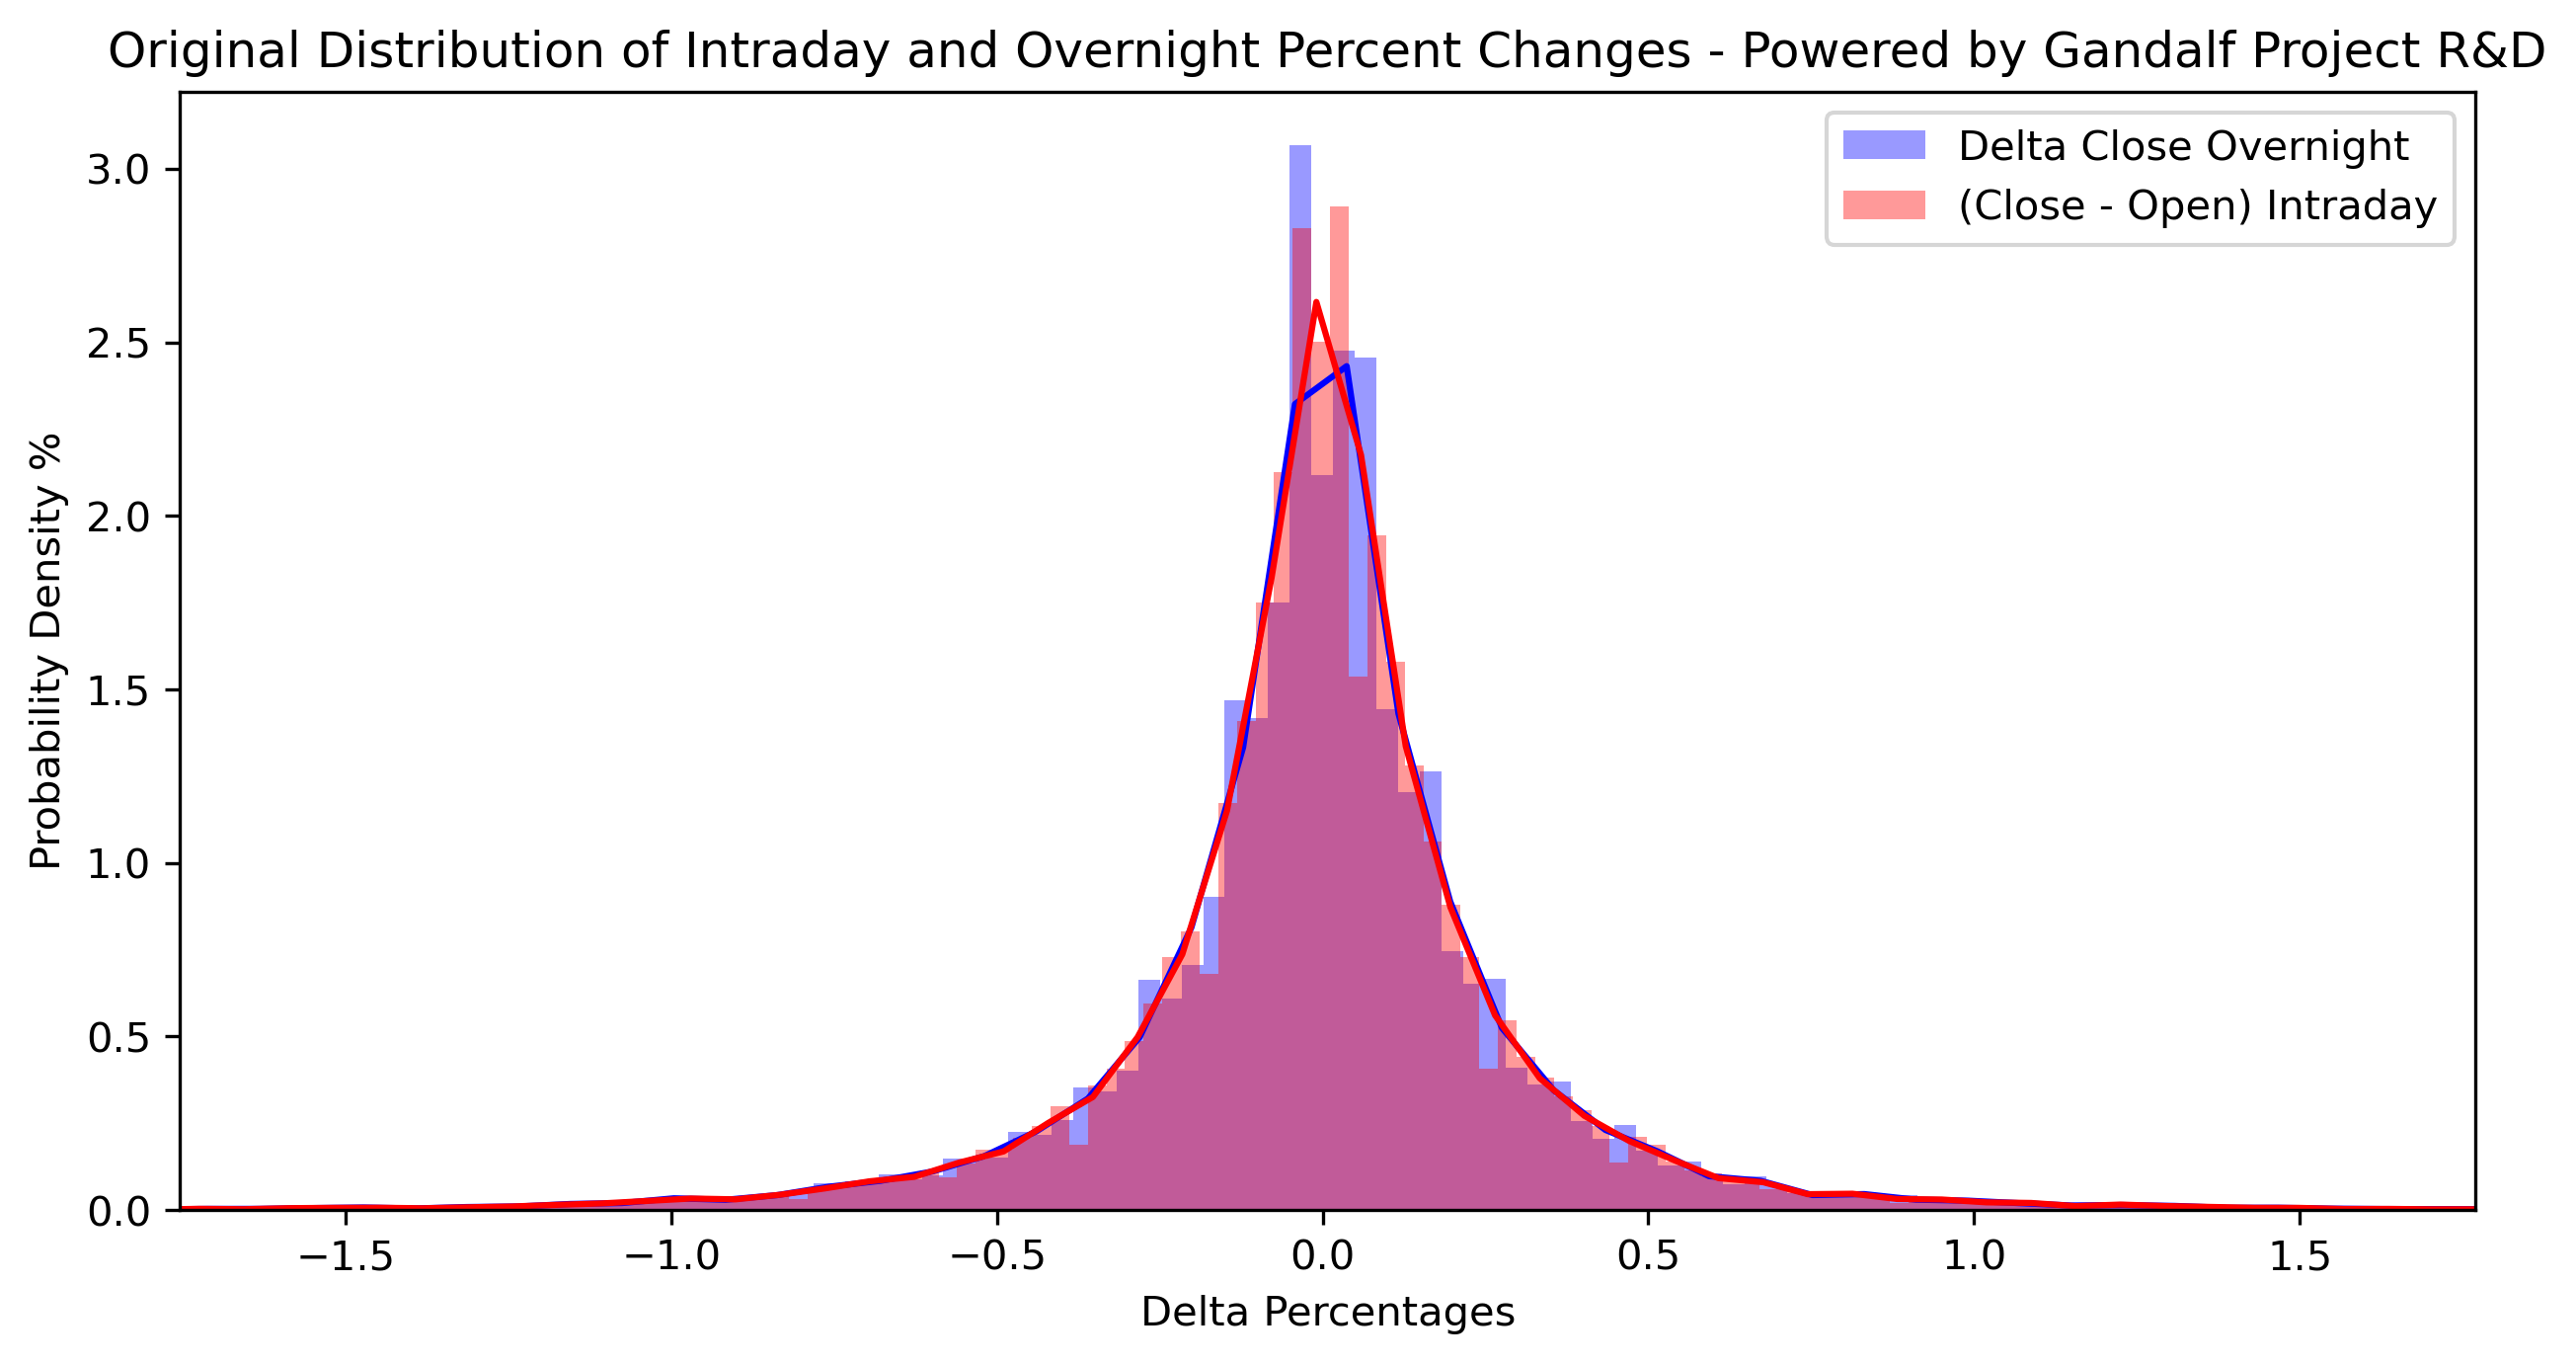

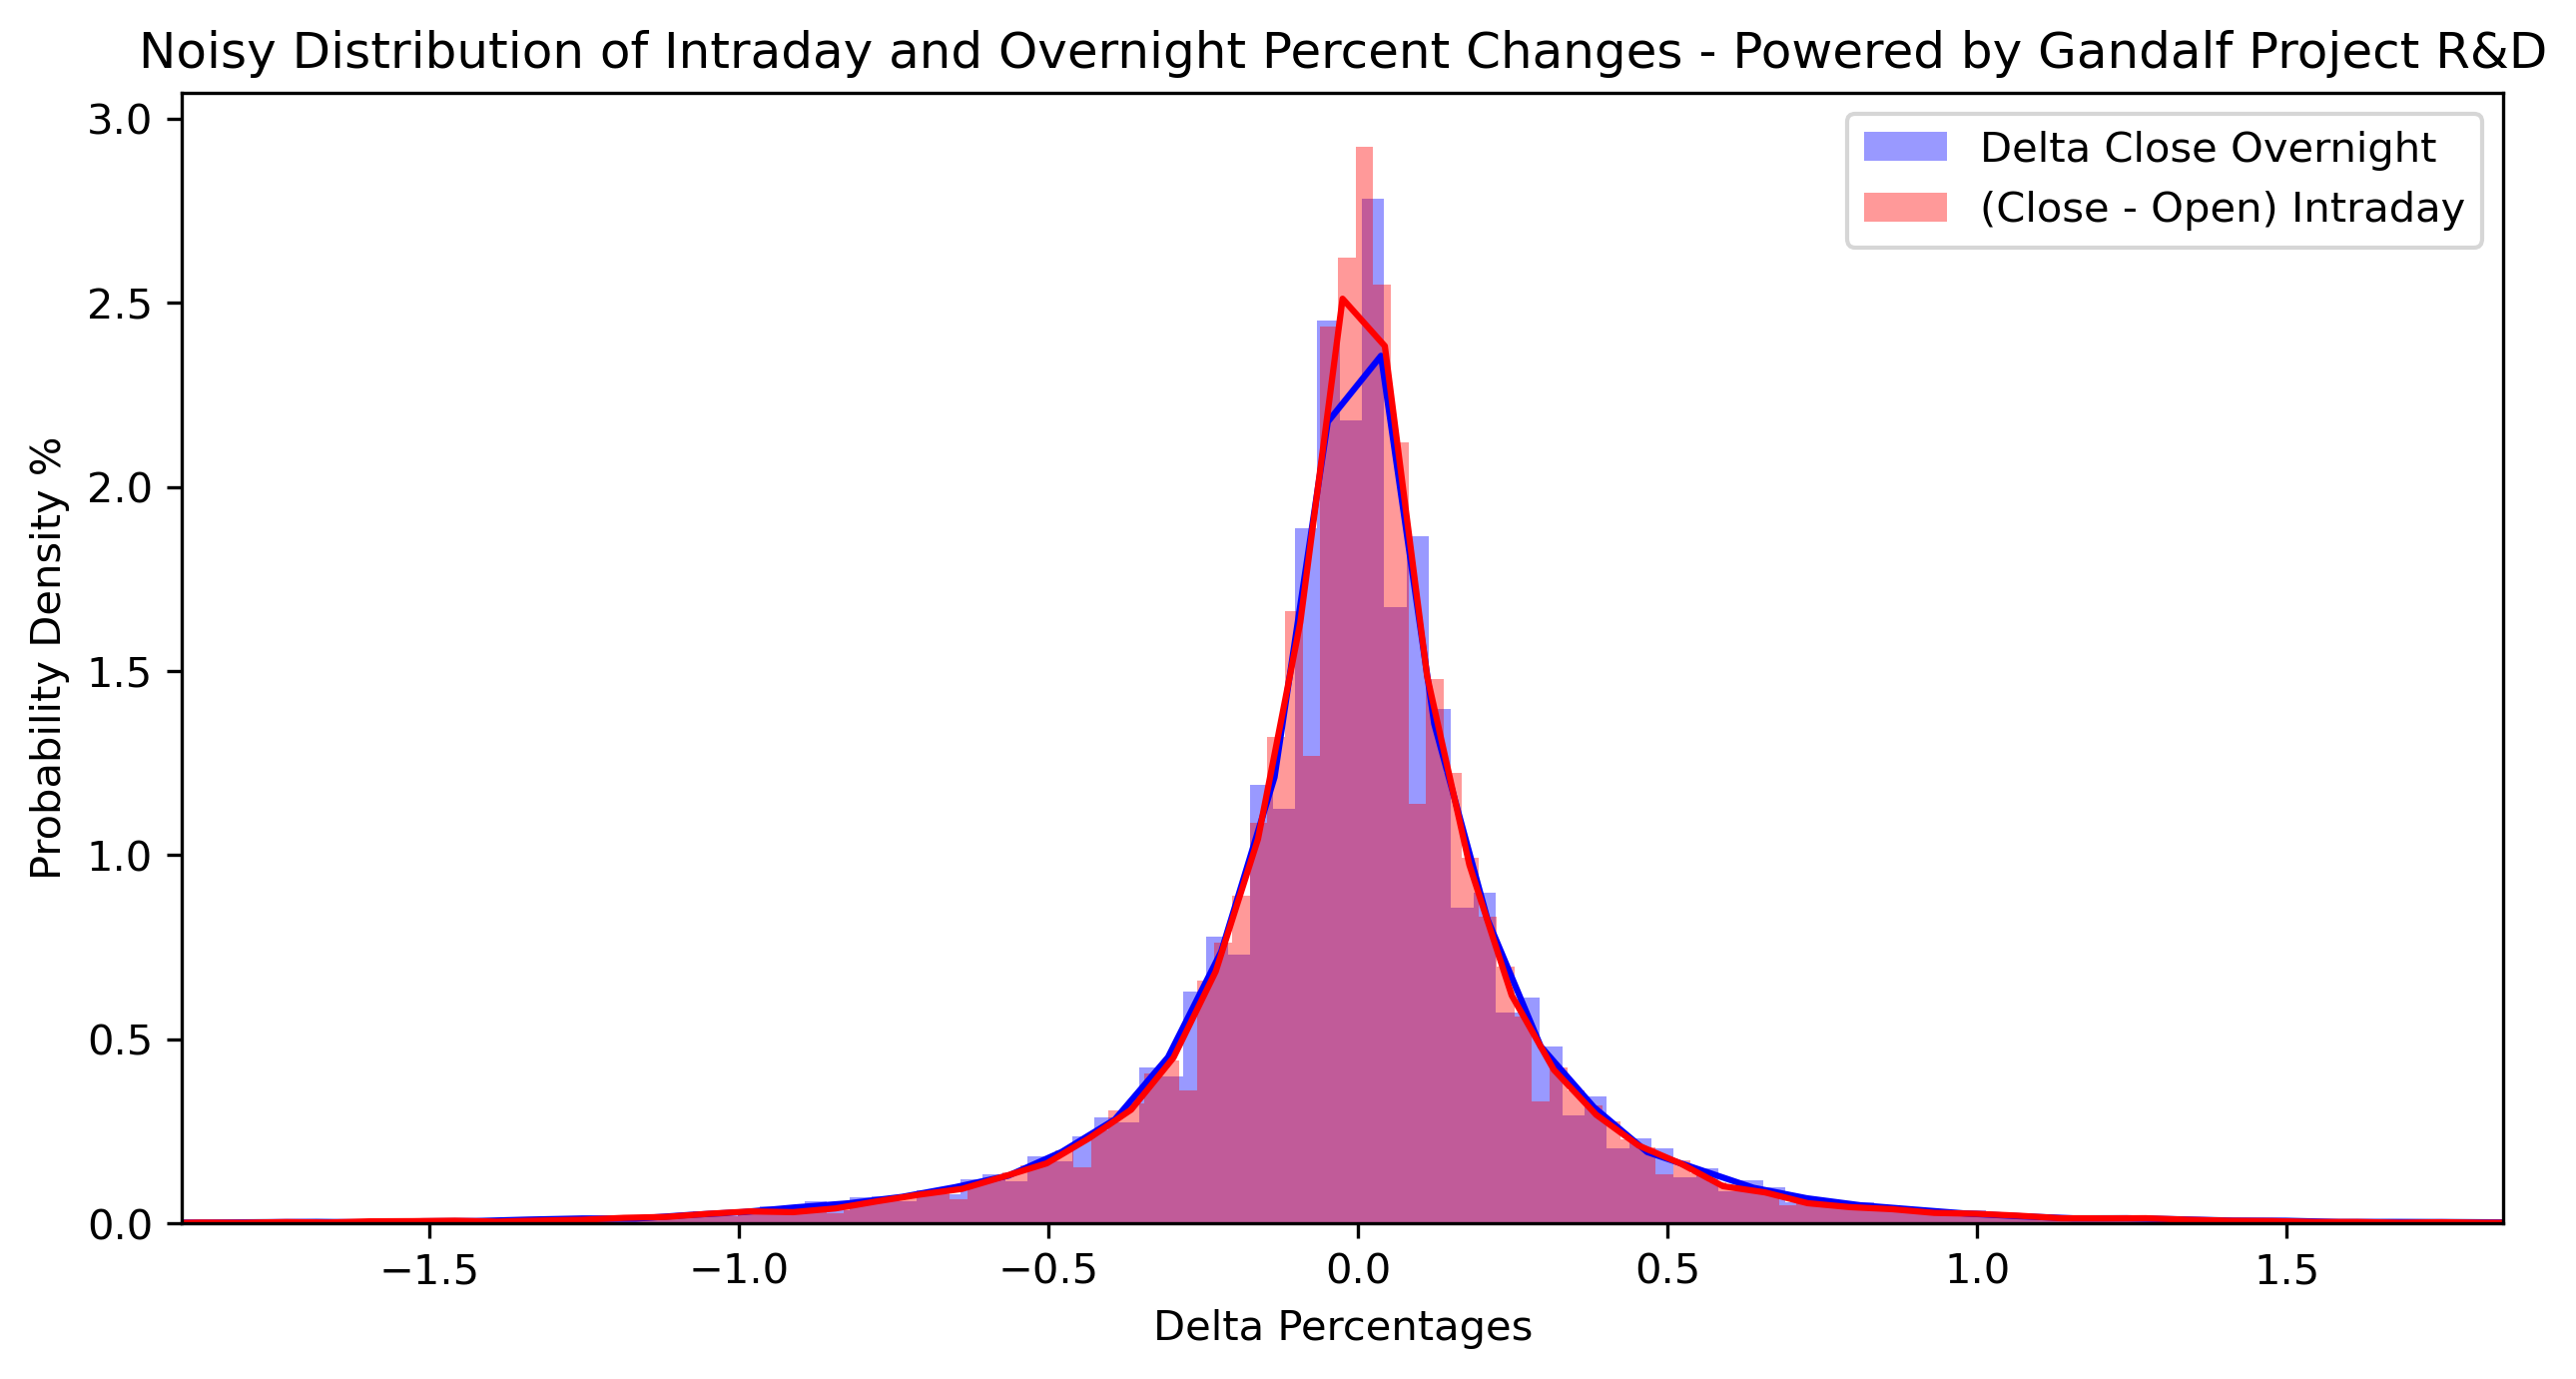

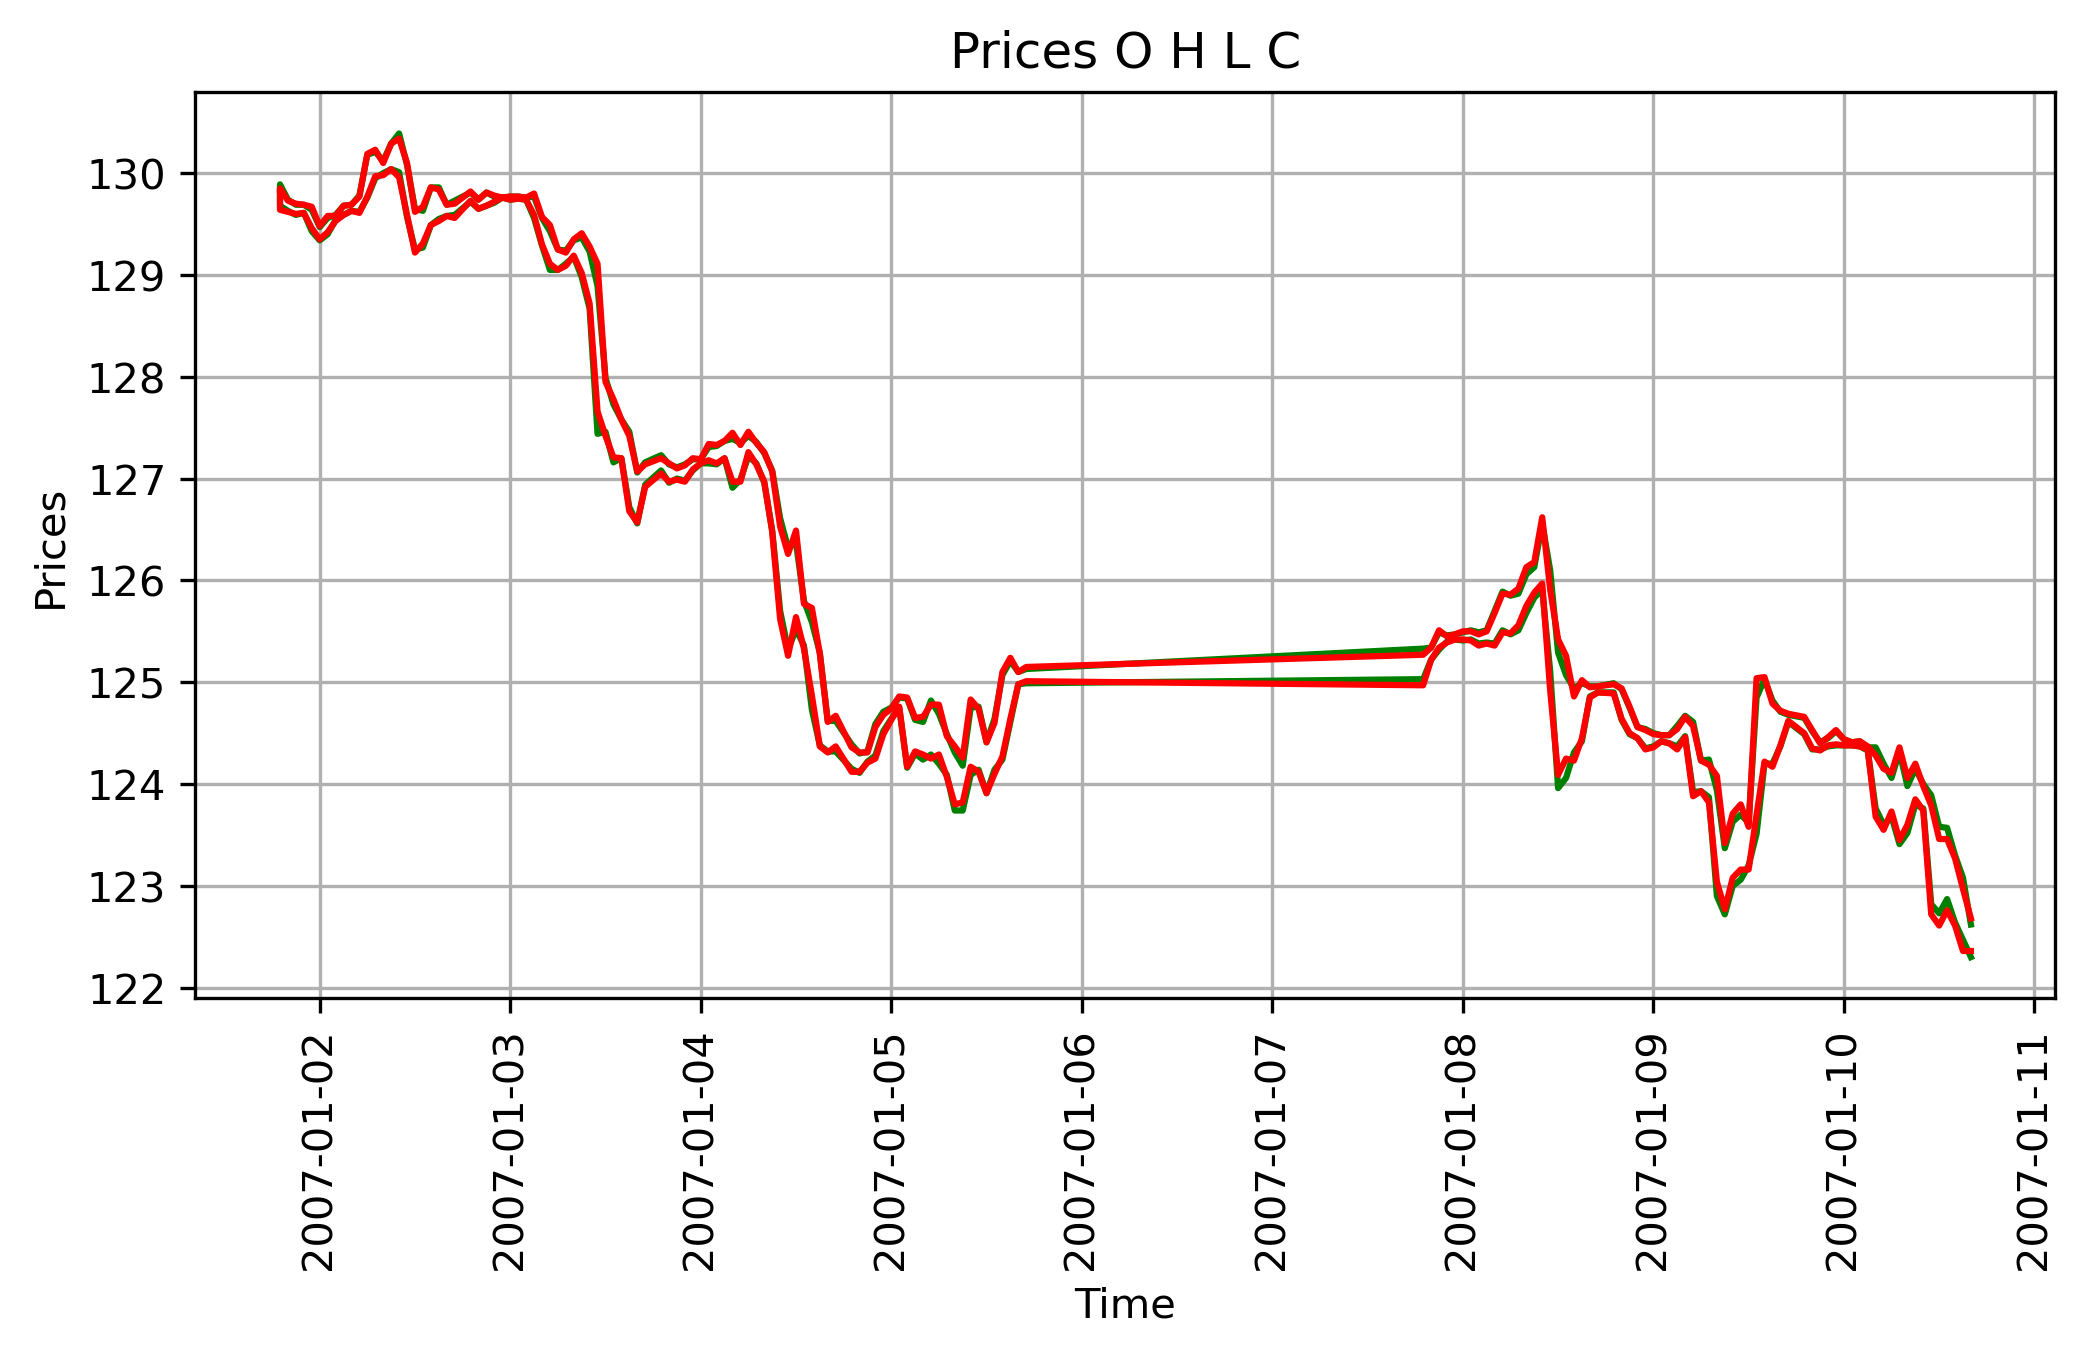


Serie addizionata di rumore (+/- 20 % max del range di barra).
File NoiseAddictedSerie1.csv esportato!

                     Noisy_Open  Noisy_High  Noisy_Low  Noisy_Close  Volume
Date_Time                                                                  
2007-01-01 19:00:00      129.82      129.84     129.82       129.84       2
2007-01-01 19:00:00      129.83      129.90     129.69       129.69      97
2007-01-01 20:00:00      129.72      129.74     129.63       129.63      81
2007-01-01 21:00:00      129.66      129.67     129.57       129.59      74
2007-01-01 22:00:00      129.64      129.69     129.61       129.61      84
2007-01-01 23:00:00      129.61      129.61     129.40       129.41     406
2007-01-02 00:00:00      129.47      129.47     129.34       129.41     436
2007-01-02 01:00:00      129.44      129.59     129.43       129.59     103
2007-01-02 02:00:00      129.55      129.58     129.53       129.54      80
2007-01-02 03:00:00      129.58      129.67     129.58     

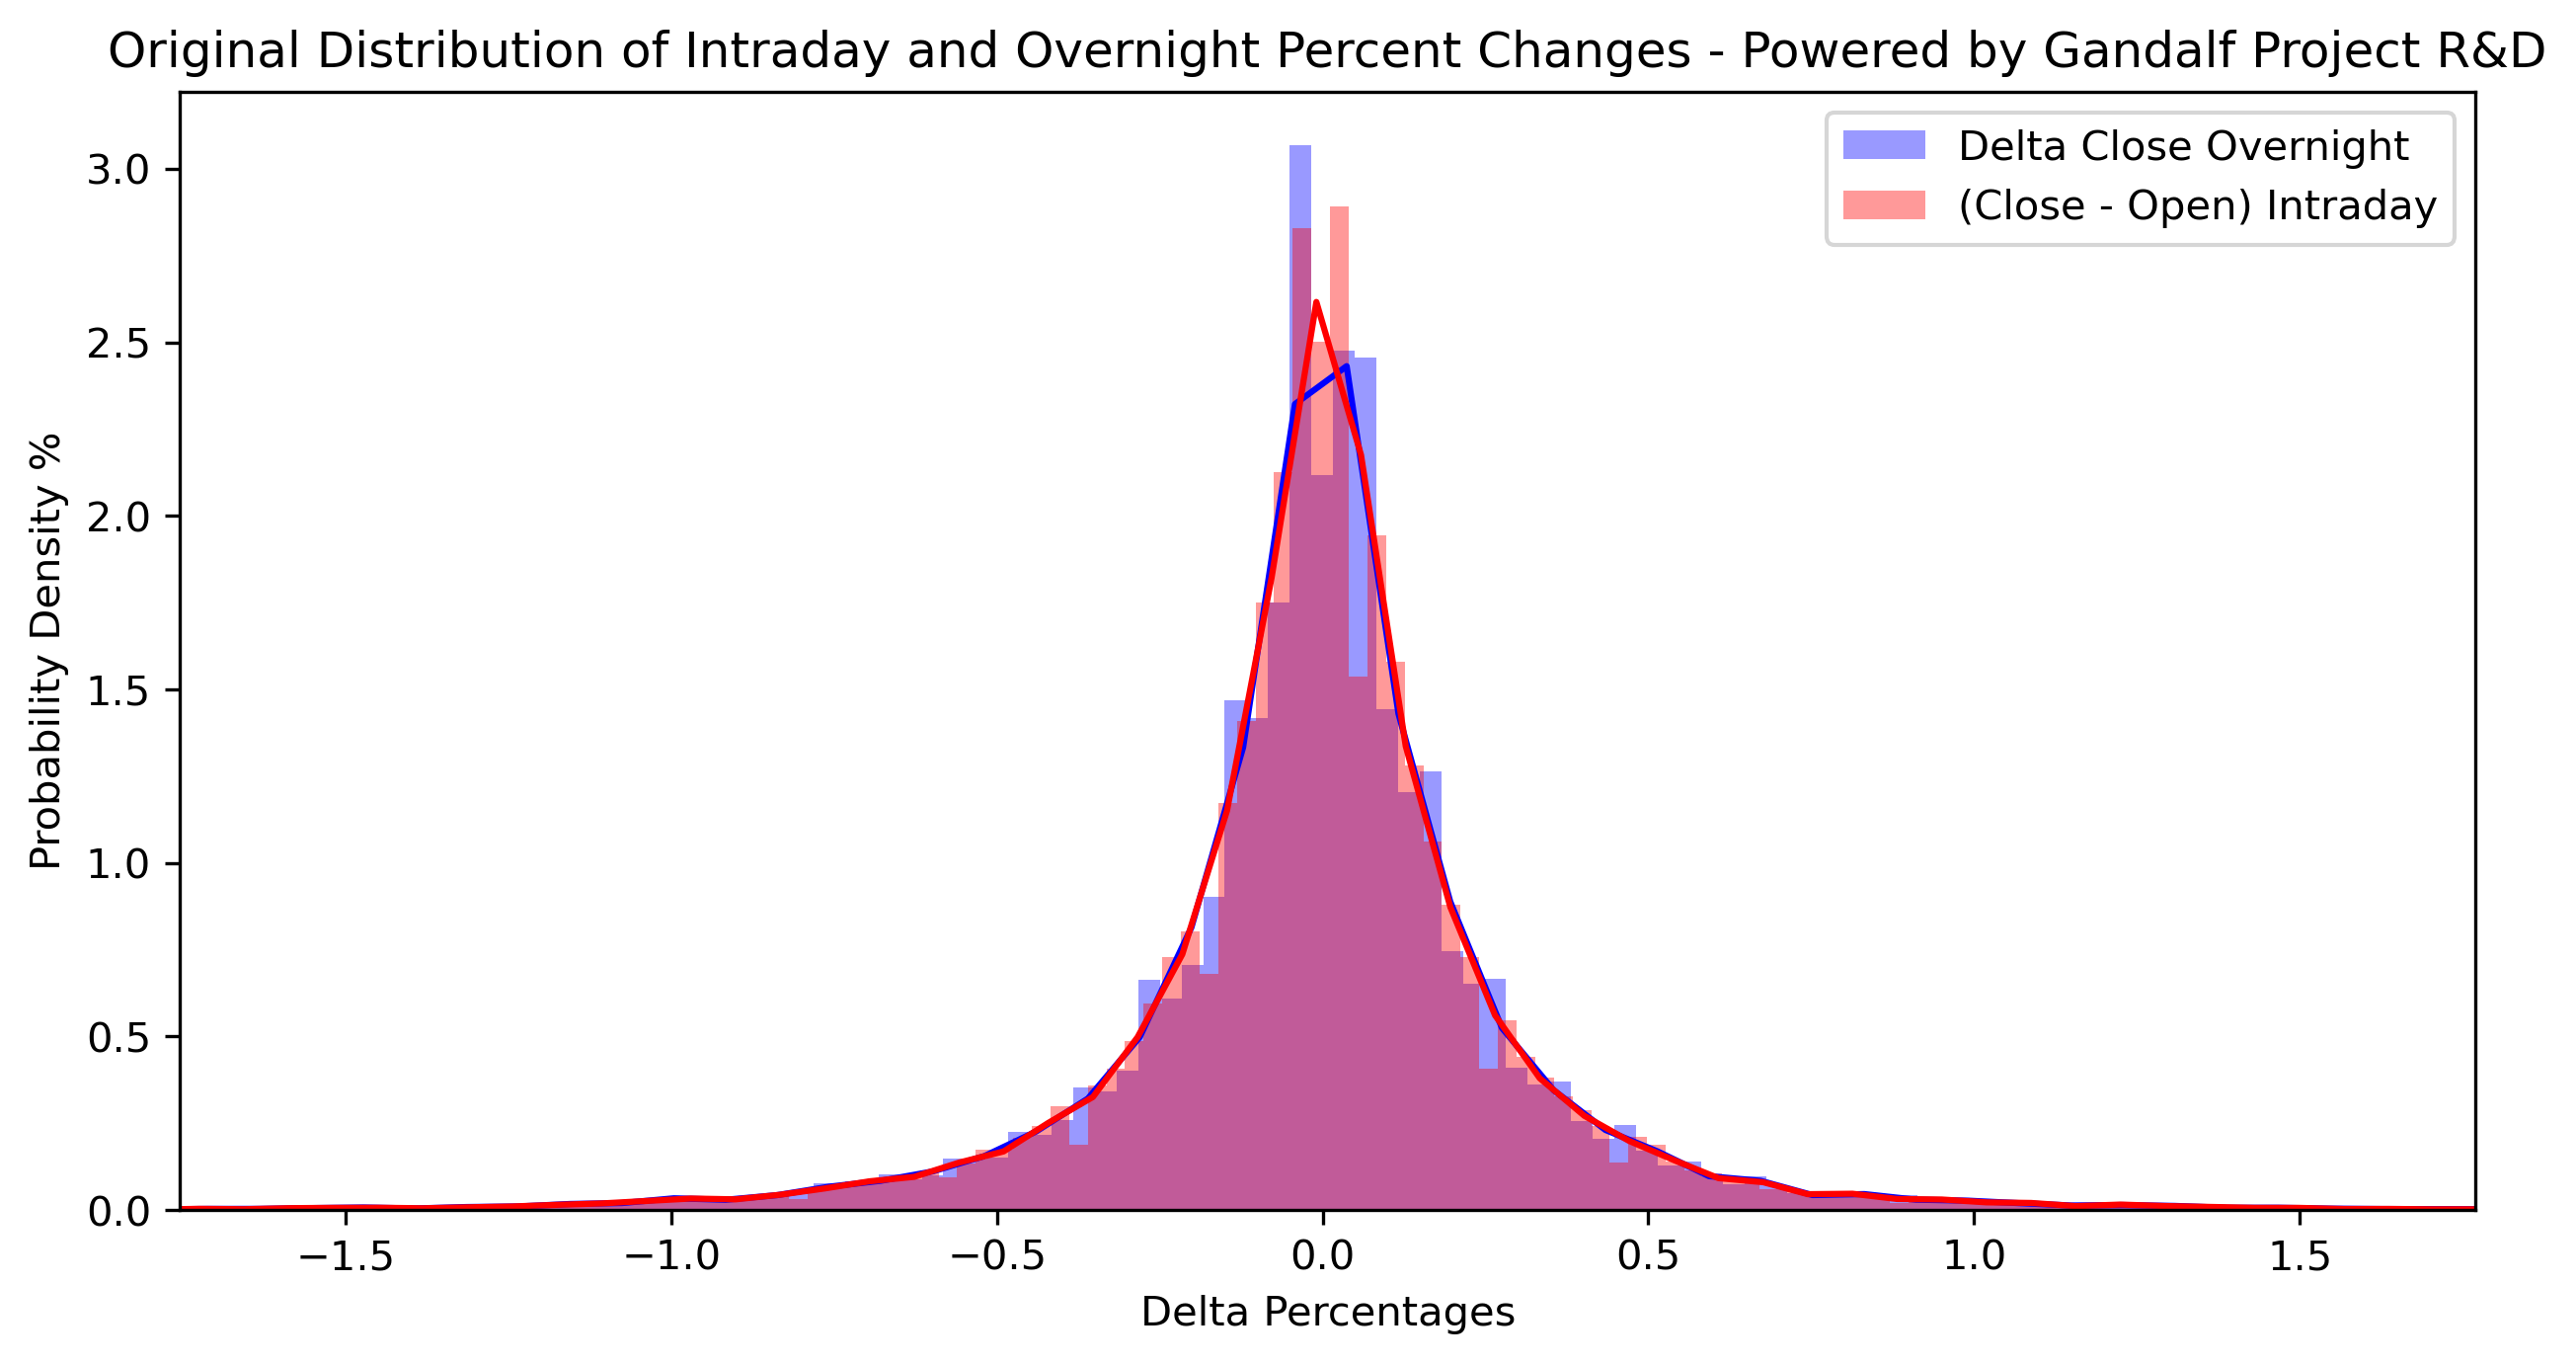

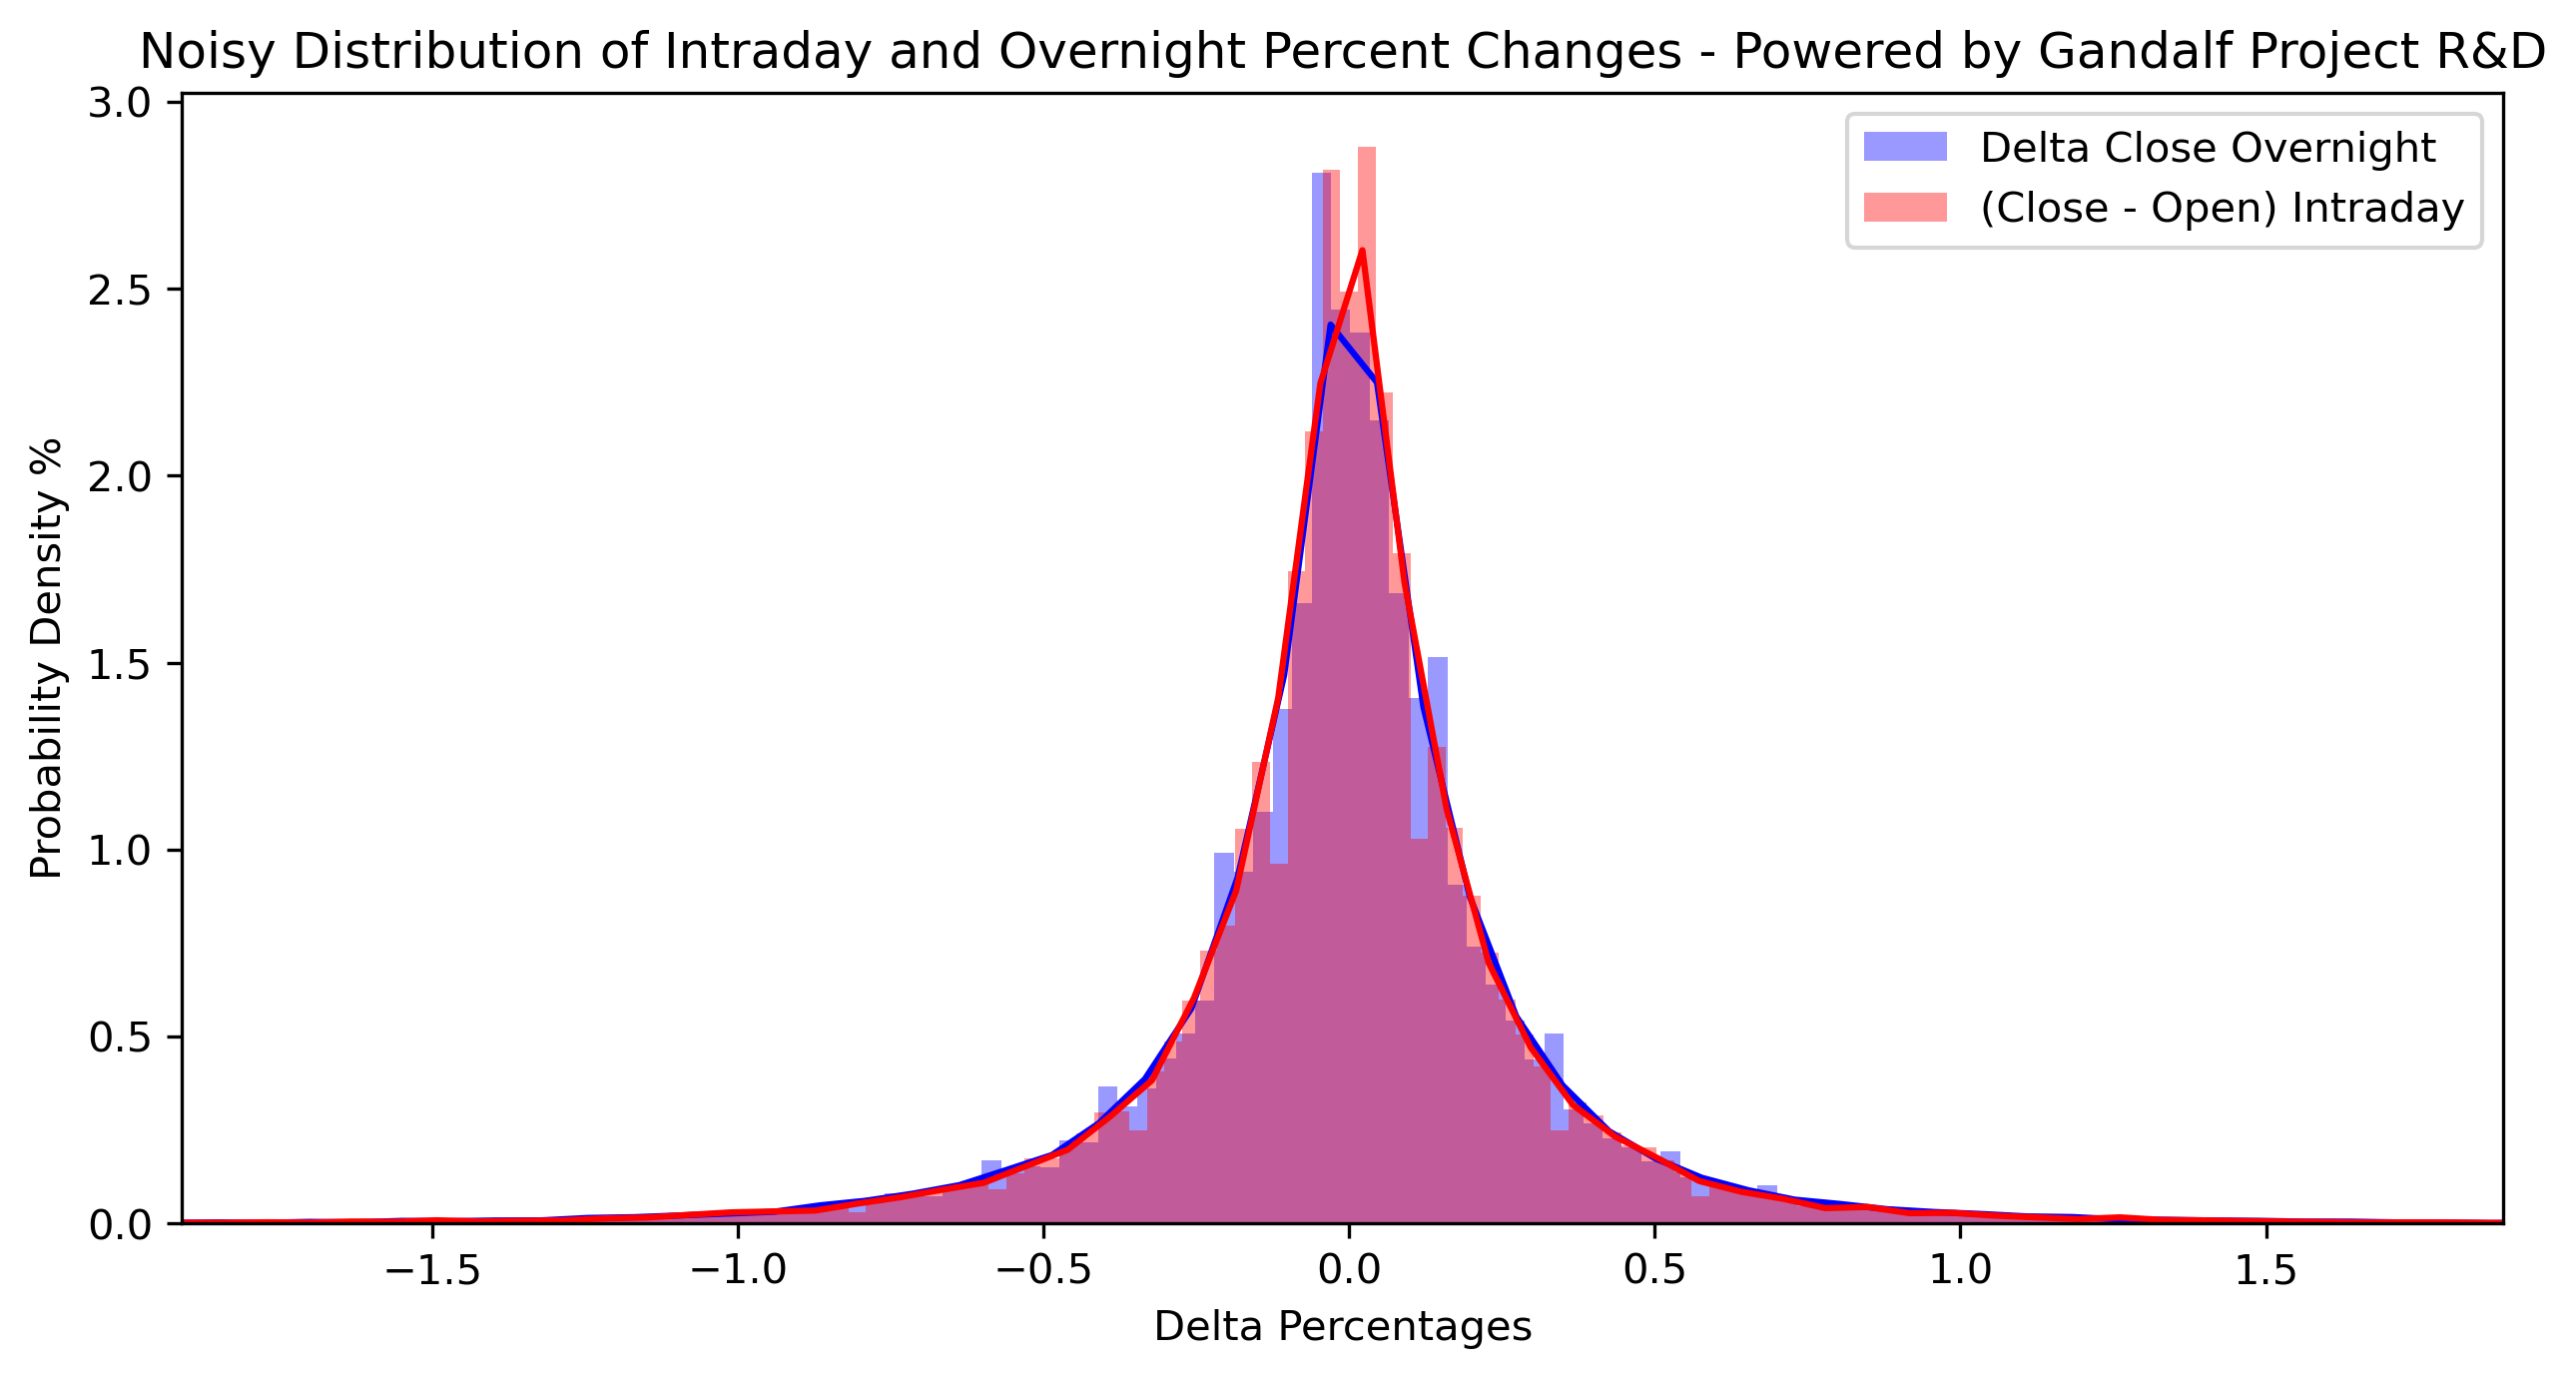

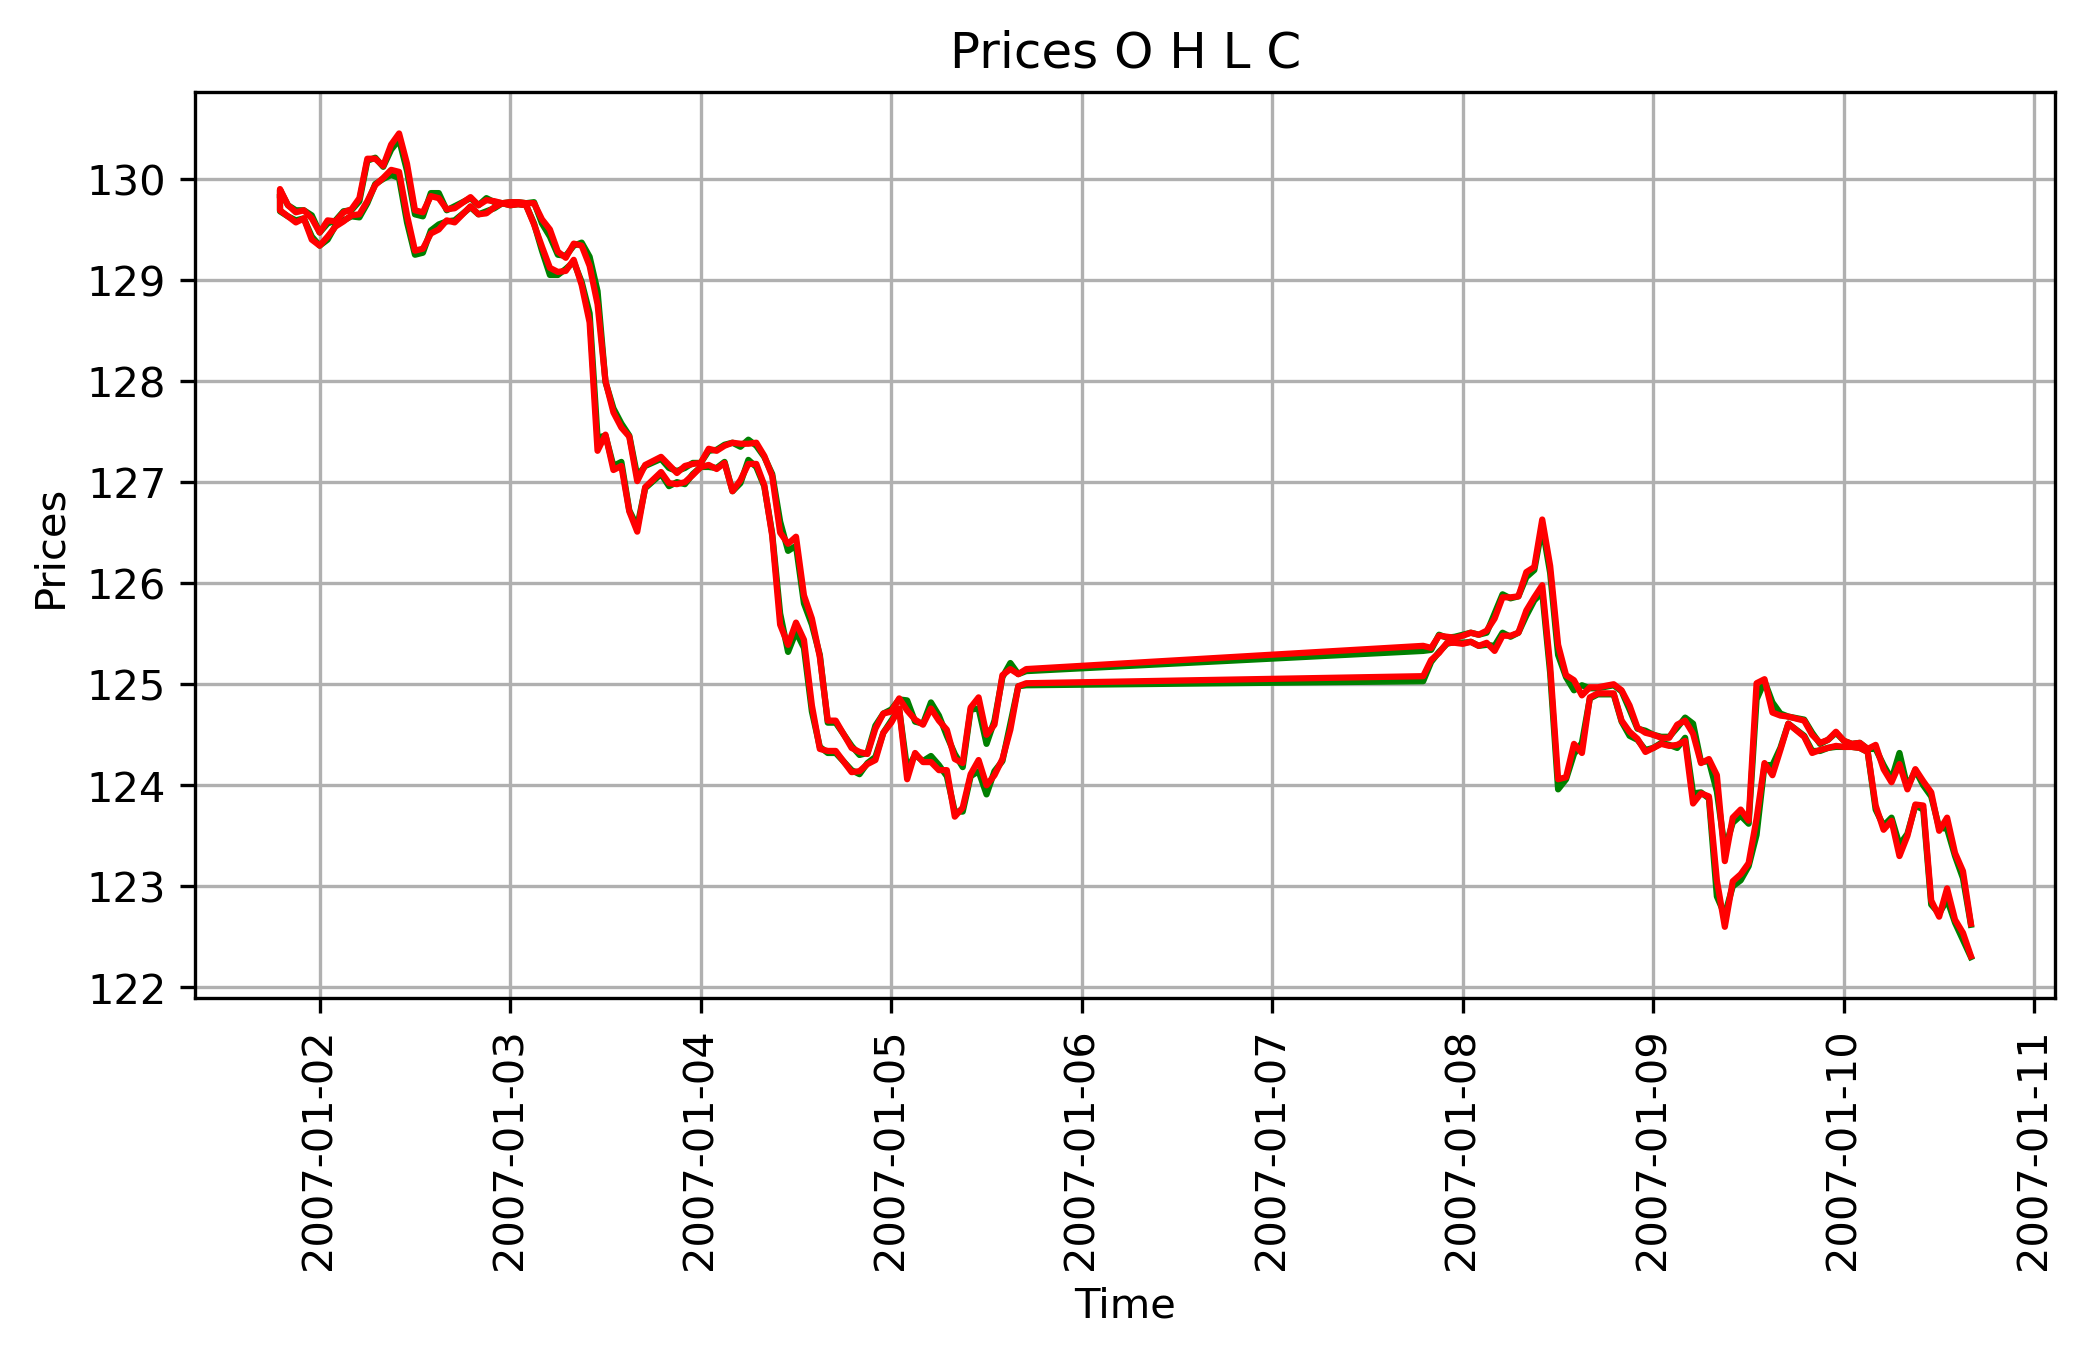


Serie addizionata di rumore (+/- 20 % max del range di barra).
File NoiseAddictedSerie2.csv esportato!


In [2]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

def single_noise_adder(array, single_range, percentage_noise_addiction):
    """
    Funzione che modifica ciascun elemento dell'array di ingresso mediante la formula:
    new_array[i] = array[i] + factor * percentage * range[i]
    """
    new_array = np.zeros(len(array))
    i = 0
    while i < len(array):
        factor = np.random.uniform(-1, 1)
        new_array[i] = round(float(array[i]) + factor * (float(percentage_noise_addiction) / 100) 
                             * abs(float(single_range[i])), 2)
        i += 1
    return new_array

def ohlc_noise_adder(O, H, L, C, percentage_noise_addiction):
    """
    Funzione che modifica ciascun elemento dell'array di ingresso mediante la formula:
    new_array[i] = array[i] + factor * percentage * range[i]
    """
    new_O = np.zeros(len(O))
    new_H = np.zeros(len(H))
    new_L = np.zeros(len(L))
    new_C = np.zeros(len(C))
    i = 0
    while i < len(O):
        factor = np.random.uniform(-1, 1)
        single_range = H[i] - L[i]
        new_O[i] = round(float(O[i]) + factor * (float(percentage_noise_addiction) / 100) 
                         * abs(float(single_range)), 2)
        new_H[i] = round(float(H[i]) + factor * (float(percentage_noise_addiction) / 100) 
                             * abs(float(single_range)), 2)
        new_L[i] = round(float(L[i]) + factor * (float(percentage_noise_addiction) / 100) 
                             * abs(float(single_range)), 2)
        new_C[i] = round(float(C[i]) + factor * (float(percentage_noise_addiction) / 100) 
                             * abs(float(single_range)), 2)
        #print(new_O[i],new_H[i],new_L[i],new_C[i])
        app = [new_O[i],new_H[i],new_L[i],new_C[i]]
        app.sort()
        #print(app)
        new_O[i] = new_O[i]
        new_H[i] = app[-1]
        new_L[i] = app[0]
        new_C[i] = new_C[i]
        #print("new:",new_O[i],new_H[i],new_L[i],new_C[i])
        i += 1
    return new_O, new_H, new_L, new_C
    
# INPUTS **********************************************************************************************************

numberofcopies = 3

noisePercent = 20

filename = "@CL_60min.txt"

startDate = "20070101"
endDate = "20180810"

# INPUTS **********************************************************************************************************

startDateParsed = datetime.date(int(startDate[0:4]), int(startDate[4:6]), int(startDate[6:]))
endDateParsed = datetime.date(int(endDate[0:4]), int(endDate[4:6]), int(endDate[6:]))

instrument = pd.read_csv(filename, 
                   usecols=['Date','Time','Open','High','Low','Close','Up','Down'], parse_dates=[['Date', 'Time']])
print("Il file contiene", len(instrument), "record")
instrument.index = instrument['Date_Time']
instrument['Volume'] = abs(instrument['Up'] + instrument['Down'])
instrument.drop('Date_Time',axis=1,inplace=True)
instrument.drop('Up',axis=1,inplace=True)
instrument.drop('Down',axis=1,inplace=True)
instrument['AvgPrice'] = round(instrument.iloc[:,0:4].mean(axis=1),2)
instrument['Range'] = round(instrument['High'] - instrument['Low'],2)
instrument['Body'] = abs(instrument['Open'] - instrument['Close'])
instrument['OpenClose'] = round((instrument['Close'] - instrument['Open']),2)
instrument['OpenClosePerc'] = round((instrument['Close'] - instrument['Open']) / instrument['Open'] * 100,2)
instrument['DeltaClosePerc'] = round((instrument['Close'] - instrument['Close'].shift(1)) / instrument['Close'].shift(1) * 100,2)

instrument = instrument.loc[startDateParsed:endDateParsed]

print(instrument[['Open','High','Low','Close','Volume']].head(10))

print("")
print(instrument.describe([0.01,0.05,0.10,0.25,0.50,0.75,0.90,0.95,0.99]).transpose())

for times in range(numberofcopies):
    stream = ohlc_noise_adder(instrument['Open'],
                              instrument['High'],
                              instrument['Low'],
                              instrument['Close'],
                              noisePercent)

    new_instrument = instrument.copy()
    new_instrument = new_instrument.drop(new_instrument.columns[[0,1,2,3,4,5,6,7,8,9,10]], axis=1)
    new_instrument['Noisy_Open'] = stream[0]
    new_instrument['Noisy_High'] = stream[1]
    new_instrument['Noisy_Low'] = stream[2]
    new_instrument['Noisy_Close'] = stream[3]
    new_instrument['Volume'] = instrument['Volume']
    new_instrument['Noisy_OpenClosePerc'] = round((new_instrument['Noisy_Close'] - new_instrument['Noisy_Open']) 
                                                  / new_instrument['Noisy_Open'] * 100,2)
    new_instrument['Noisy_DeltaClosePerc'] = round((new_instrument['Noisy_Close'] - new_instrument['Noisy_Close'].shift(1)) 
                                                   / new_instrument['Noisy_Close'].shift(1) * 100,2)

    print("")
    print(new_instrument[['Noisy_Open','Noisy_High','Noisy_Low','Noisy_Close','Volume']].head(10))

    print("")
    print(new_instrument.describe([0.01,0.05,0.10,0.25,0.50,0.75,0.90,0.95,0.99]).transpose())

    new_filename = "NoiseAddictedSerie" + str(times) + ".csv"
    new_instrument.to_csv(new_filename,index=True)

    # MODULO GRAFICO **************************************************************************************************

    # codice per limitare automaticamente il grafico della distribuzione
    a = np.array(instrument['DeltaClosePerc'].dropna(0))
    b = np.array(instrument['OpenClosePerc'].dropna(0))
    p1 = np.percentile(a, 99.9)
    p2 = np.percentile(a, 99.9)
    m1 = np.percentile(a, 0.1)
    m2 = np.percentile(a, 0.1)
    maxsns = max(p1,p2)
    minsns = min(m1,m2)
    #print(p1,p2)
    #print(m1,m2)
    #print(maxsns,minsns)

    plt.figure(figsize=(10,5),dpi=300)
    sns.distplot(instrument['DeltaClosePerc'].dropna(), bins=300, color='b', label='Delta Close Overnight')
    sns.distplot(instrument['OpenClosePerc'].dropna(), bins=300, color='r', label='(Close - Open) Intraday')
    plt.xlim(xmin = minsns, xmax = maxsns)
    plt.title("Original Distribution of Intraday and Overnight Percent Changes - Powered by Gandalf Project R&D")
    plt.xlabel("Delta Percentages")
    plt.ylabel("Probability Density %")
    plt.legend()
    plt.show()

    # codice per limitare automaticamente il grafico della distribuzione
    a = np.array(new_instrument['Noisy_DeltaClosePerc'].dropna(0))
    b = np.array(new_instrument['Noisy_OpenClosePerc'].dropna(0))
    np1 = np.percentile(a, 99.9)
    np2 = np.percentile(a, 99.9)
    nm1 = np.percentile(a, 0.1)
    nm2 = np.percentile(a, 0.1)
    nmaxsns = max(np1,np2)
    nminsns = min(nm1,nm2)
    #print(p1,p2)
    #print(m1,m2)
    #print(maxsns,minsns)

    plt.figure(figsize=(10,5),dpi=300)
    sns.distplot(new_instrument['Noisy_DeltaClosePerc'].dropna(), bins=300, color='b', label='Delta Close Overnight')
    sns.distplot(new_instrument['Noisy_OpenClosePerc'].dropna(), bins=300, color='r', label='(Close - Open) Intraday')
    plt.xlim(xmin = nminsns, xmax = nmaxsns)
    plt.title("Noisy Distribution of Intraday and Overnight Percent Changes - Powered by Gandalf Project R&D")
    plt.xlabel("Delta Percentages")
    plt.ylabel("Probability Density %")
    plt.legend()
    plt.show()

    plt.figure(figsize=(8,4), dpi=300)

    #plt.plot(instrument['Open'][:161], color='green')
    plt.plot(instrument['High'][:161], color='green')
    plt.plot(instrument['Low'][:161], color='green')
    #plt.plot(instrument['Close'][:161], color='green')

    #plt.plot(new_instrument['Noisy_Open'][:161], color='red')
    plt.plot(new_instrument['Noisy_High'][:161], color='red')
    plt.plot(new_instrument['Noisy_Low'][:161], color='red')
    #plt.plot(new_instrument['Noisy_Close'][:161], color='red')

    plt.xlabel("Time")
    plt.ylabel("Prices")
    plt.title('Prices O H L C')
    plt.xticks(rotation='vertical')
    plt.grid(True)
    #plt.legend()
    plt.show()

    # MODULO GRAFICO **************************************************************************************************
    
    print("")
    print('Serie addizionata di rumore (+/-',noisePercent,'% max del range di barra).')
    print('File',new_filename,'esportato!')